In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib

In [2]:
toyo=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
toyo

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

# EDA

In [3]:
toyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
toyo1=pd.concat([toyo.iloc[:,2:4],toyo.iloc[:,6:7],toyo.iloc[:,8:9],toyo.iloc[:,12:14],toyo.iloc[:,15:18]],axis=1)
toyo1

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [5]:
toyo2=toyo1.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyo2

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1431   7500   69  20544   86  1300      3      5   69    1025
1432  10845   72  19000   86  1300      3      5   69    1015
1433   8500   71  17016   86  1300      3      5   69    1015
1434   7250   70  16916   86  1300      3      5   69    1015
1435   6950   76      1  110  1600      5      5   19    1114

[1436 rows x 9 columns]

In [6]:
toyo2[toyo2.duplicated()]

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
113  24950    8  13253  116  2000      5      5  234    1320

In [7]:
toyo3=toyo2.drop_duplicates().reset_index(drop=True)
toyo3

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1430   7500   69  20544   86  1300      3      5   69    1025
1431  10845   72  19000   86  1300      3      5   69    1015
1432   8500   71  17016   86  1300      3      5   69    1015
1433   7250   70  16916   86  1300      3      5   69    1015
1434   6950   76      1  110  1600      5      5   19    1114

[1435 rows x 9 columns]

In [8]:
toyo3.describe()

Price          Age             KM           HP            CC  \
count   1435.000000  1435.000000    1435.000000  1435.000000   1435.000000   
mean   10720.915679    55.980488   68571.782578   101.491986   1576.560976   
std     3608.732978    18.563312   37491.094553    14.981408    424.387533   
min     4350.000000     1.000000       1.000000    69.000000   1300.000000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.000000   
50%     9900.000000    61.000000   63451.000000   110.000000   1600.000000   
75%    11950.000000    70.000000   87041.500000   110.000000   1600.000000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.000000   

             Doors        Gears           QT       Weight  
count  1435.000000  1435.000000  1435.000000  1435.000000  
mean      4.032753     5.026481    87.020209  1072.287108  
std       0.952667     0.188575    40.959588    52.251882  
min       2.000000     3.000000    19.000000  1000.000000  
25%       3.000000     5.000000    69.000000  1040.000000  
50%       4.000000     5.000000    85.000000  1070.000000  
75%       5.000000     5.000000    85.000000  1085.000000  
max       5.000000     6.000000   283.000000  1615.000000

# Correlation Analysis

In [9]:
toyo3.corr()

Price       Age        KM        HP        CC     Doors     Gears  \
Price   1.000000 -0.876273 -0.569420  0.314134  0.124375  0.183604  0.063831   
Age    -0.876273  1.000000  0.504575 -0.155293 -0.096549 -0.146929 -0.005629   
KM     -0.569420  0.504575  1.000000 -0.332904  0.103822 -0.035193  0.014890   
HP      0.314134 -0.155293 -0.332904  1.000000  0.035207  0.091803  0.209642   
CC      0.124375 -0.096549  0.103822  0.035207  1.000000  0.079254  0.014732   
Doors   0.183604 -0.146929 -0.035193  0.091803  0.079254  1.000000 -0.160101   
Gears   0.063831 -0.005629  0.014890  0.209642  0.014732 -0.160101  1.000000   
QT      0.211508 -0.193319  0.283312 -0.302287  0.305982  0.107353 -0.005125   
Weight  0.575869 -0.466484 -0.023969  0.087143  0.335077  0.301734  0.021238   

              QT    Weight  
Price   0.211508  0.575869  
Age    -0.193319 -0.466484  
KM      0.283312 -0.023969  
HP     -0.302287  0.087143  
CC      0.305982  0.335077  
Doors   0.107353  0.301734  
Gears  -0.005125  0.021238  
QT      1.000000  0.621988  
Weight  0.621988  1.000000

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


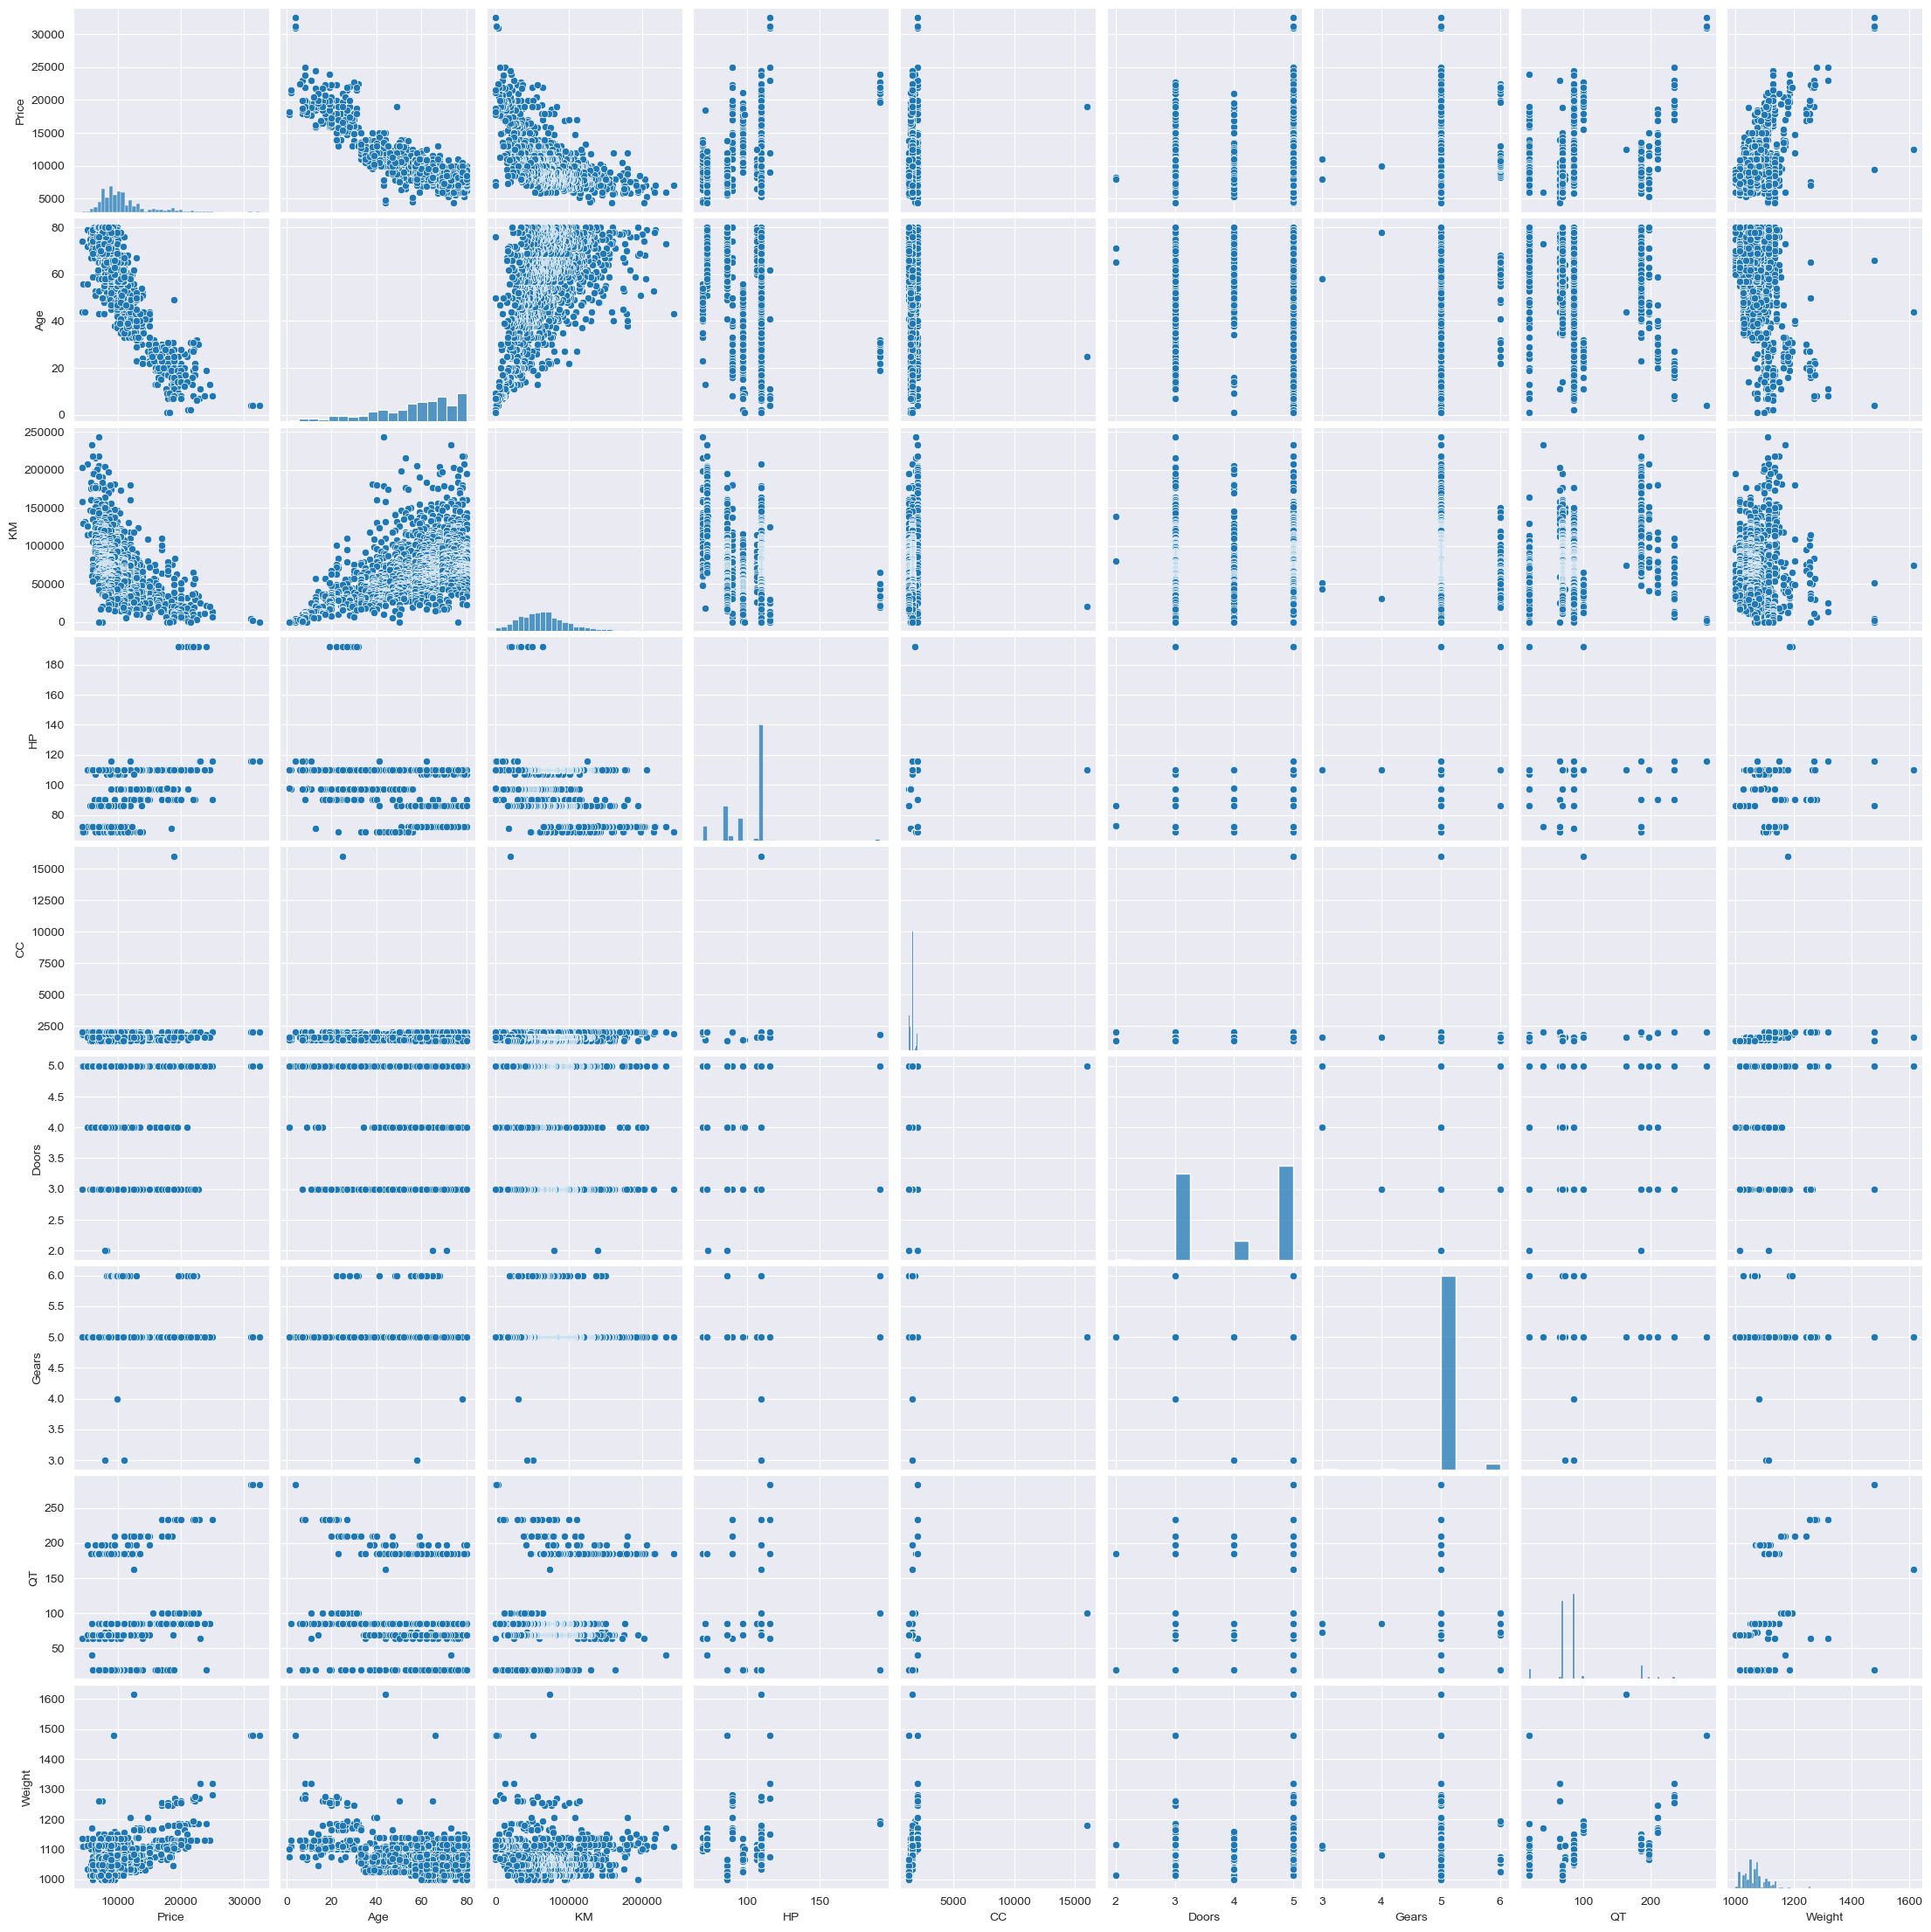

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(toyo3)

# Model building

In [11]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo3).fit()

In [12]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [13]:
model.tvalues,np.round(model.pvalues,5)

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64,
 Intercept    0.00011
 Age          0.00000
 KM           0.00000
 HP           0.00000
 CC           0.18824
 Doors        0.98164
 Gears        0.00245
 QT           0.00329
 Weight       0.00000
 dtype: float64)

In [14]:
model.rsquared,model.rsquared_adj

(0.8625200256947001, 0.8617487495415147)

In [15]:
slr_c=smf.ols('Price~CC',data=toyo3).fit()
slr_c.tvalues,slr_c.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [16]:
slr_d=smf.ols('Price~Doors',data=toyo3).fit()
slr_d.tvalues,slr_d.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [17]:
mlr_cd=smf.ols('Price~CC+Doors',data=toyo3).fit()
mlr_cd.tvalues,mlr_cd.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

# Model Validation Techniques

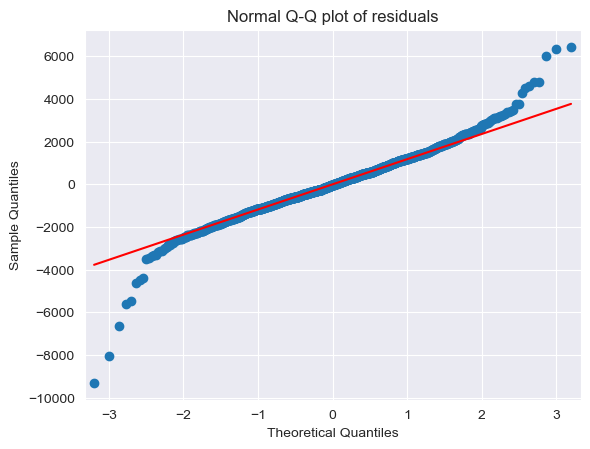

In [18]:
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [19]:
list(np.where(model.resid>6000)) 

[array([109, 146, 522], dtype=int64)]

In [20]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [21]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()  

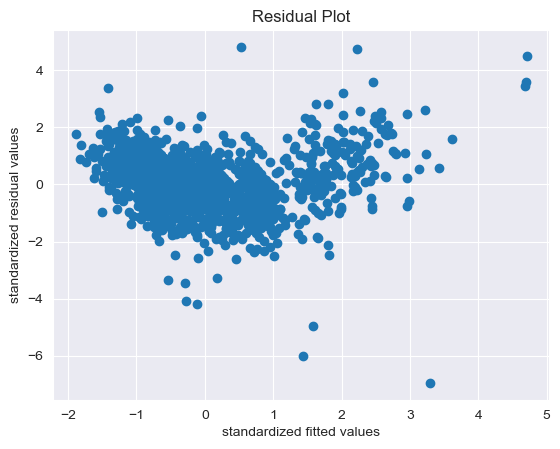

In [22]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 


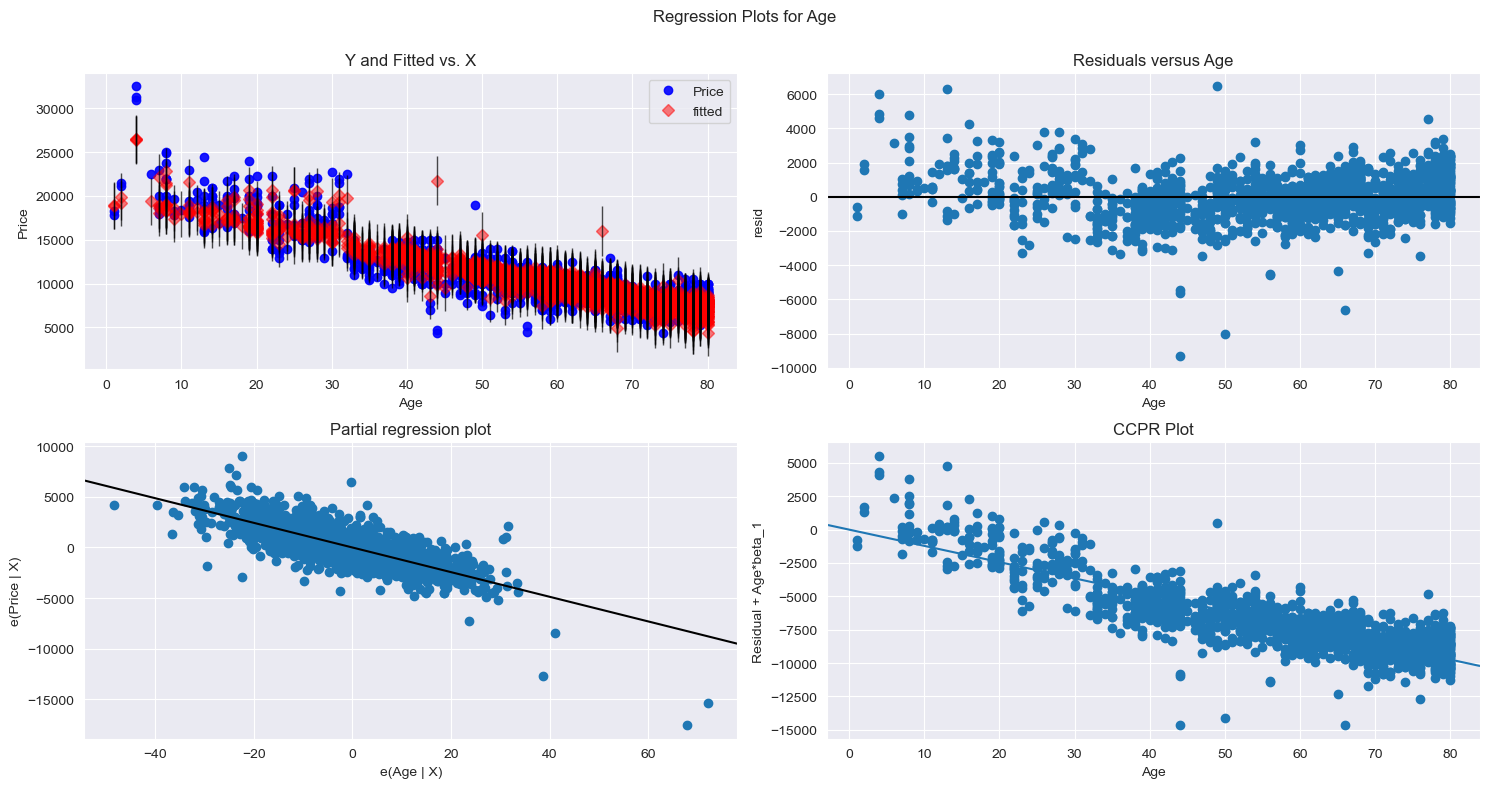

In [23]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()


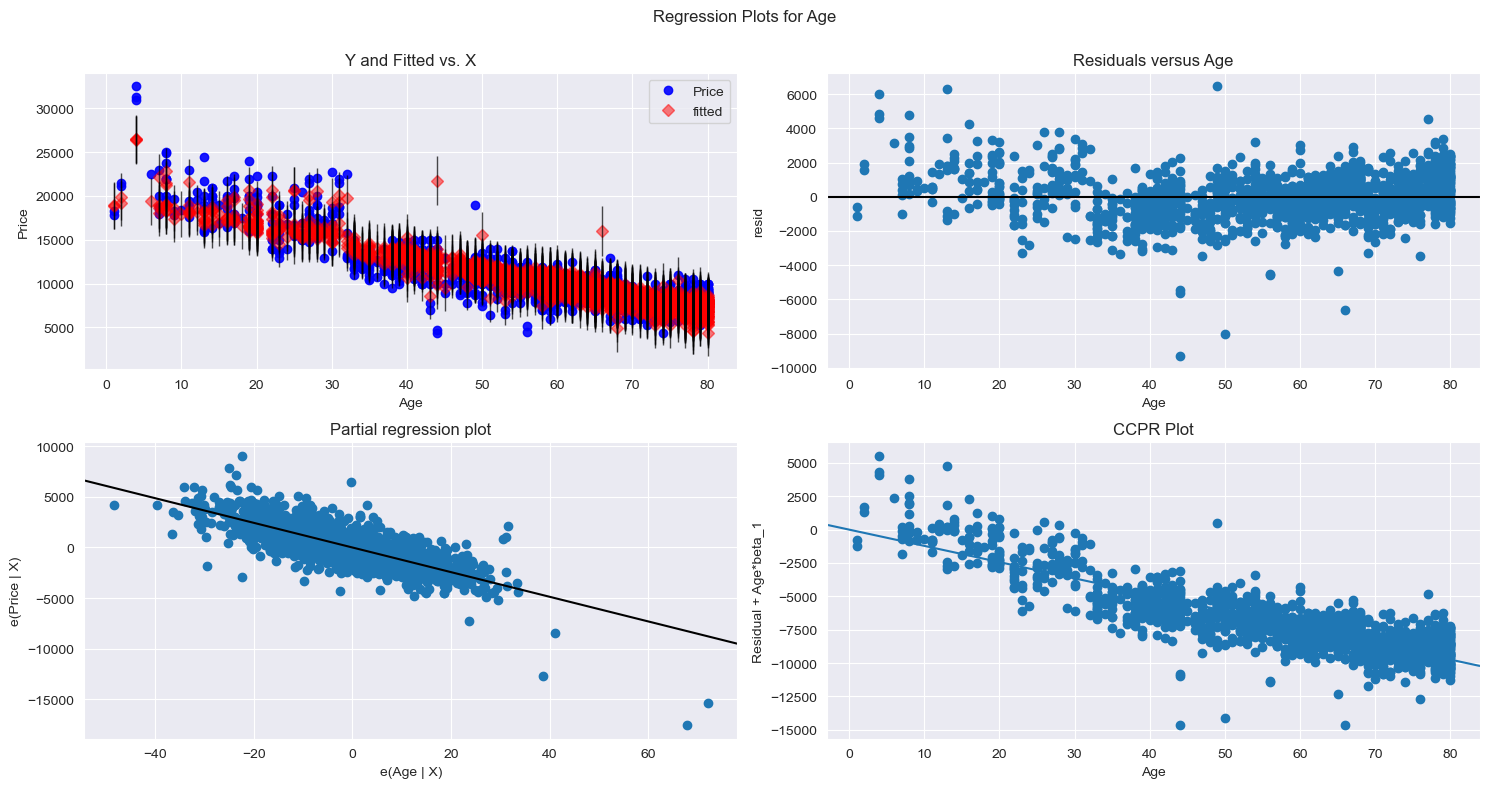

In [24]:
a=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=a)
plt.show()


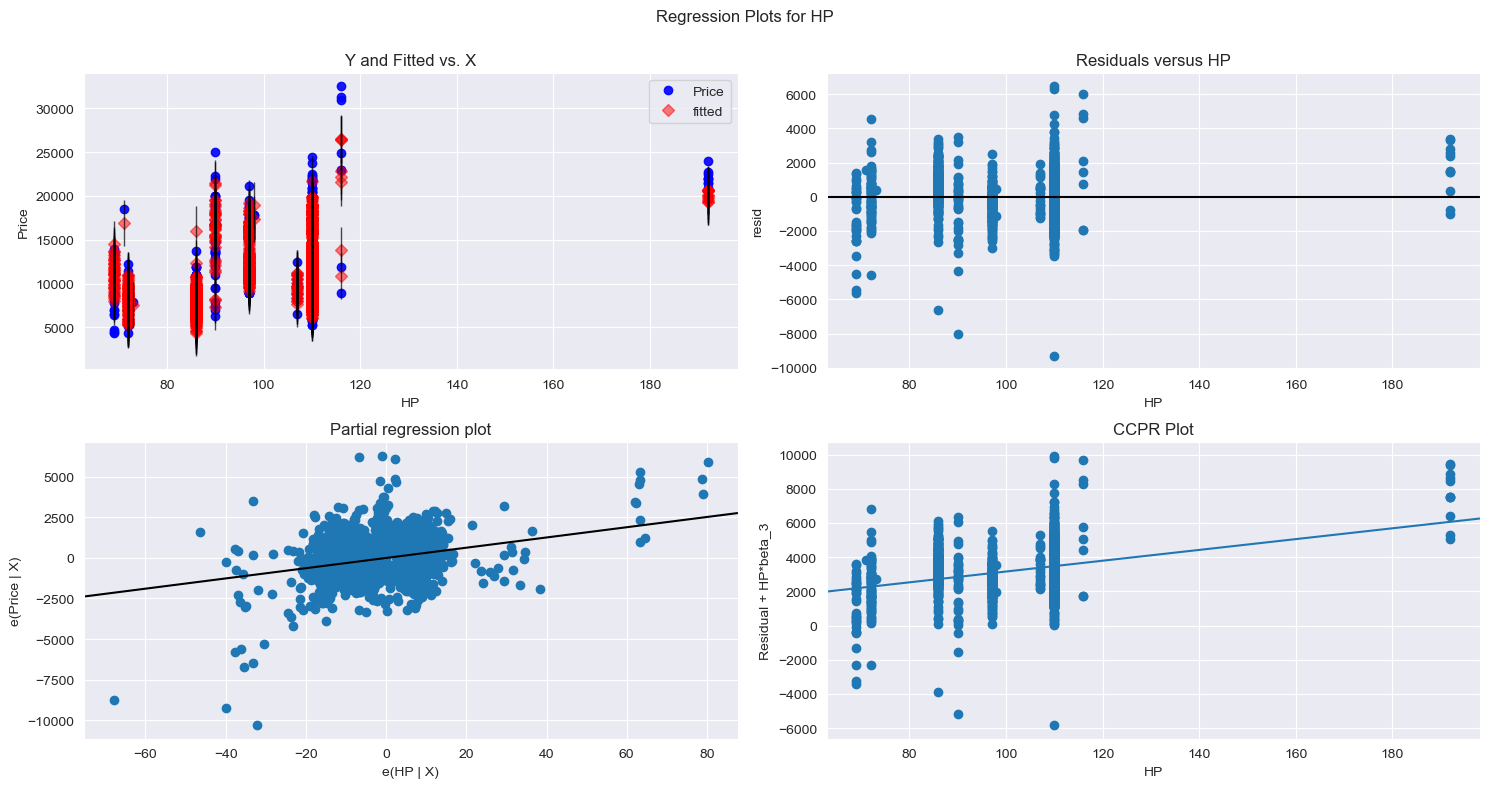

In [25]:
b=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=b)
plt.show()

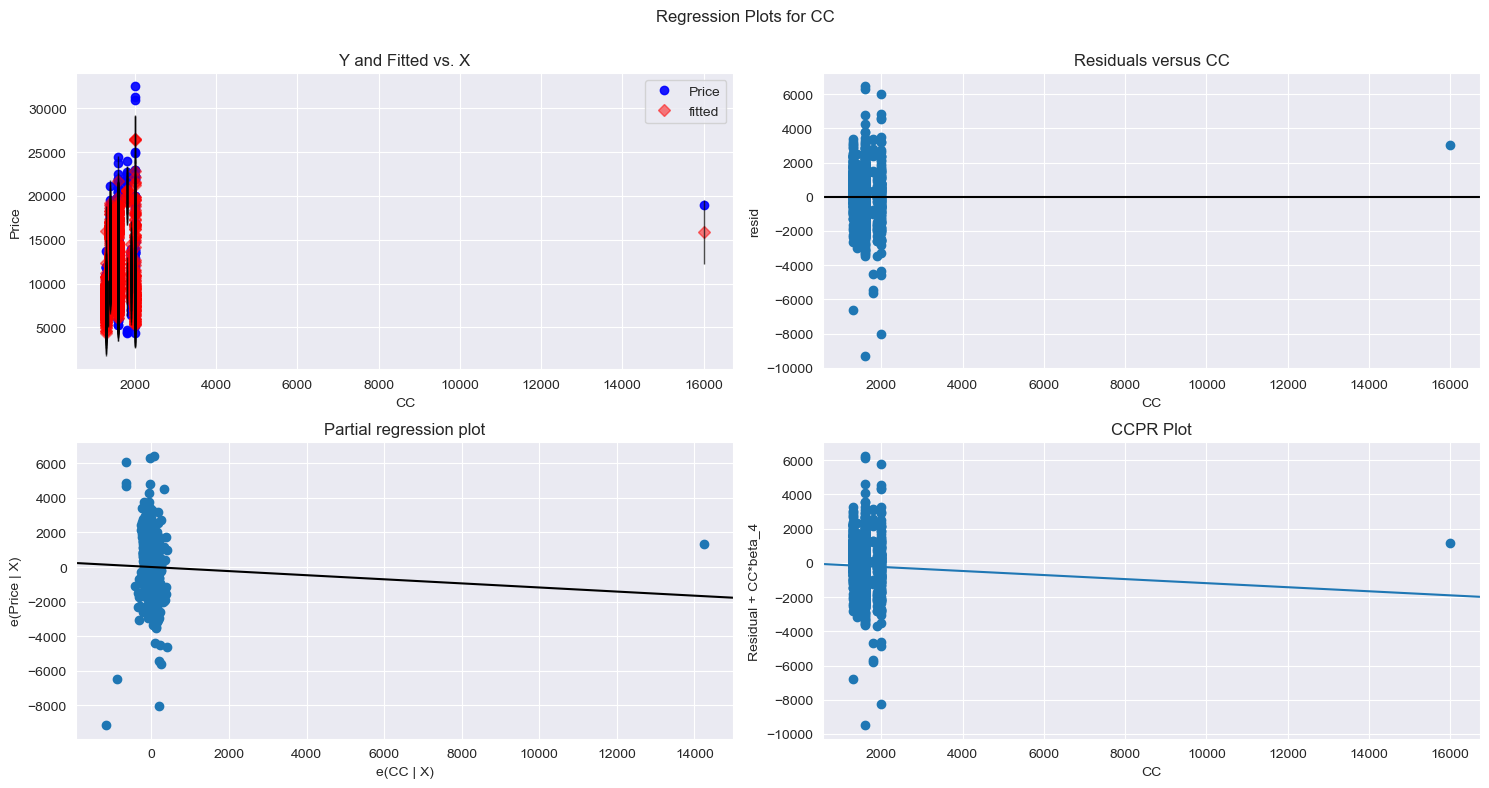

In [26]:
c=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=c)
plt.show()

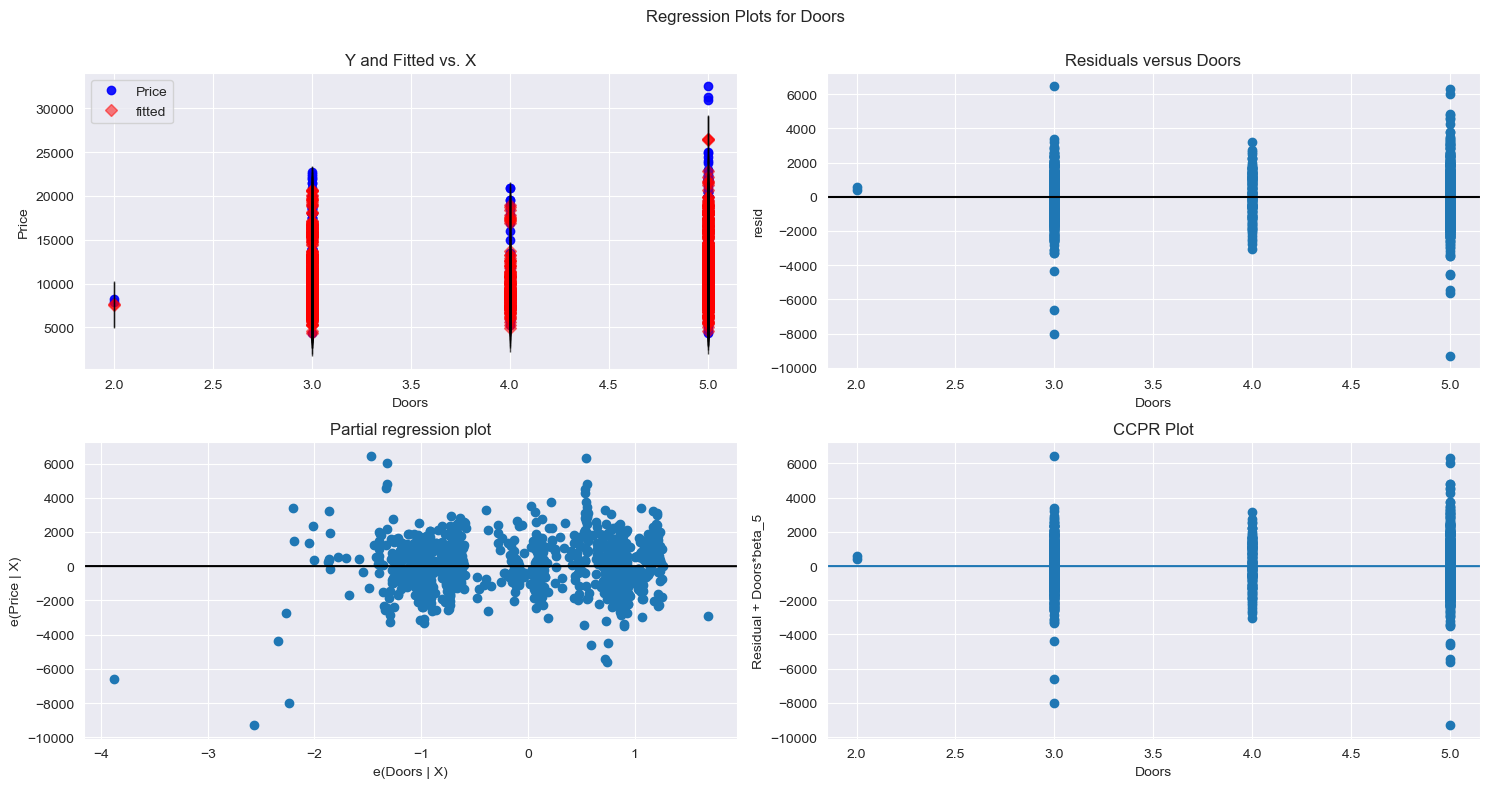

In [27]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()


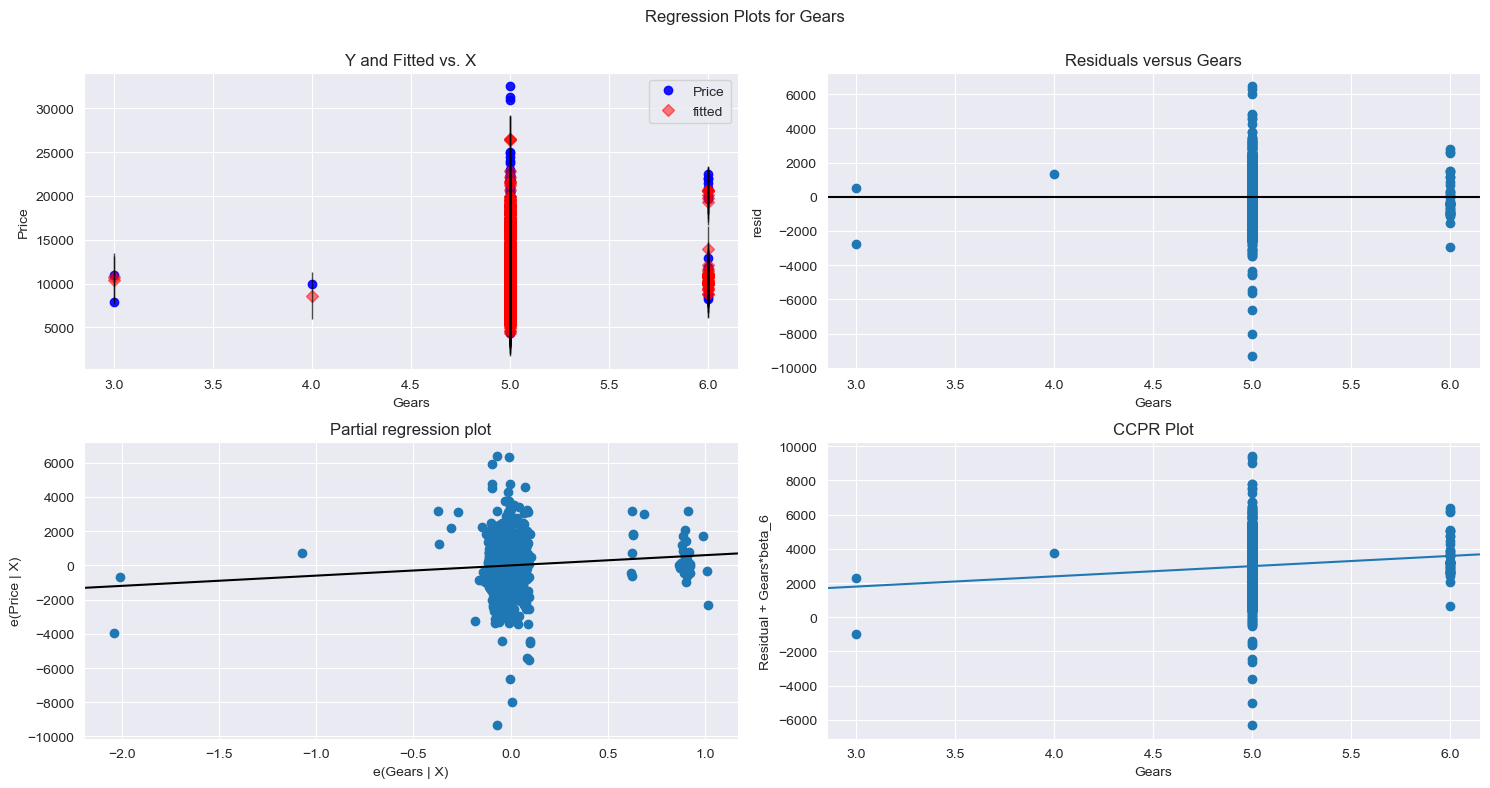

In [28]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

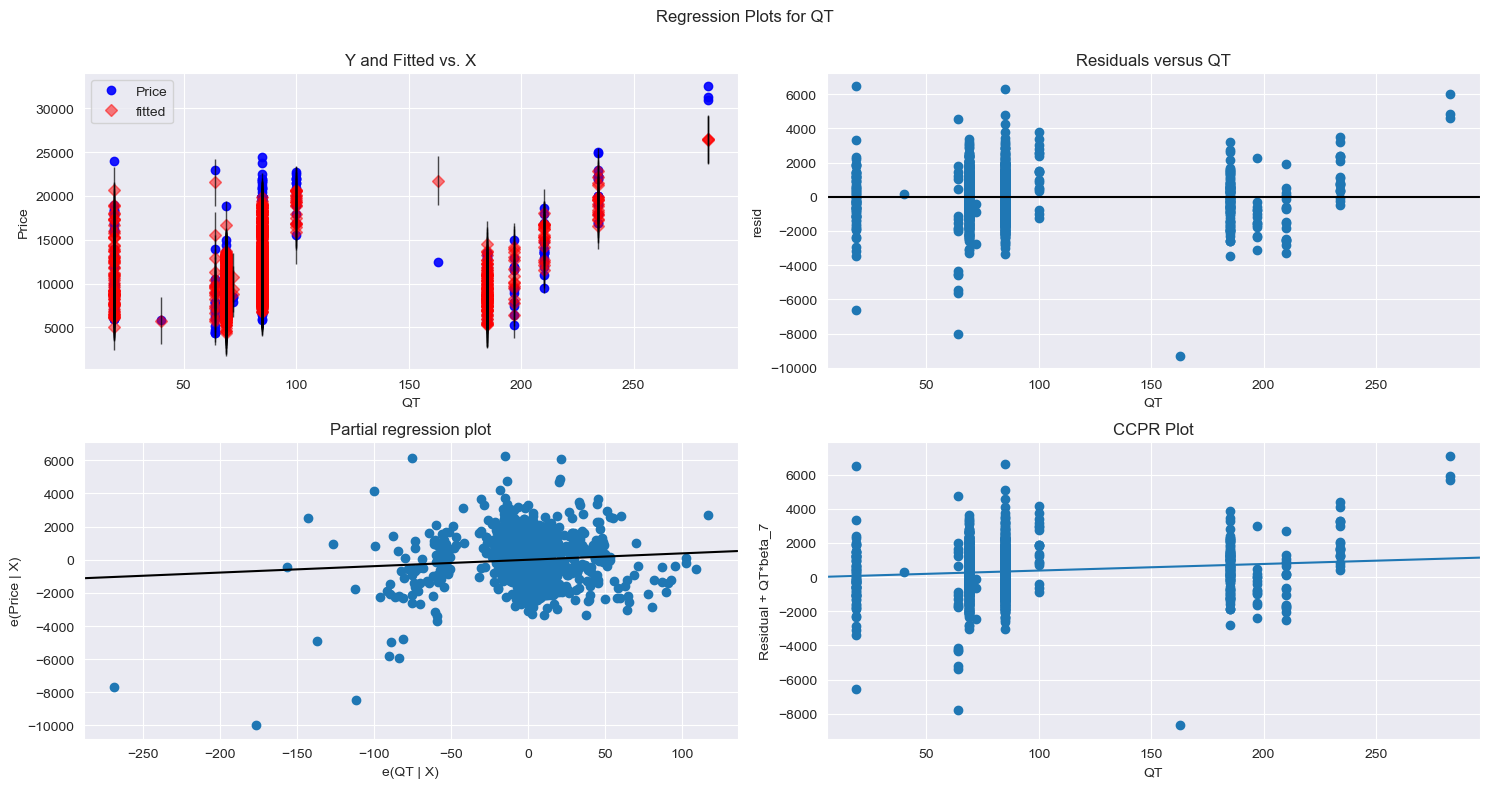

In [29]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

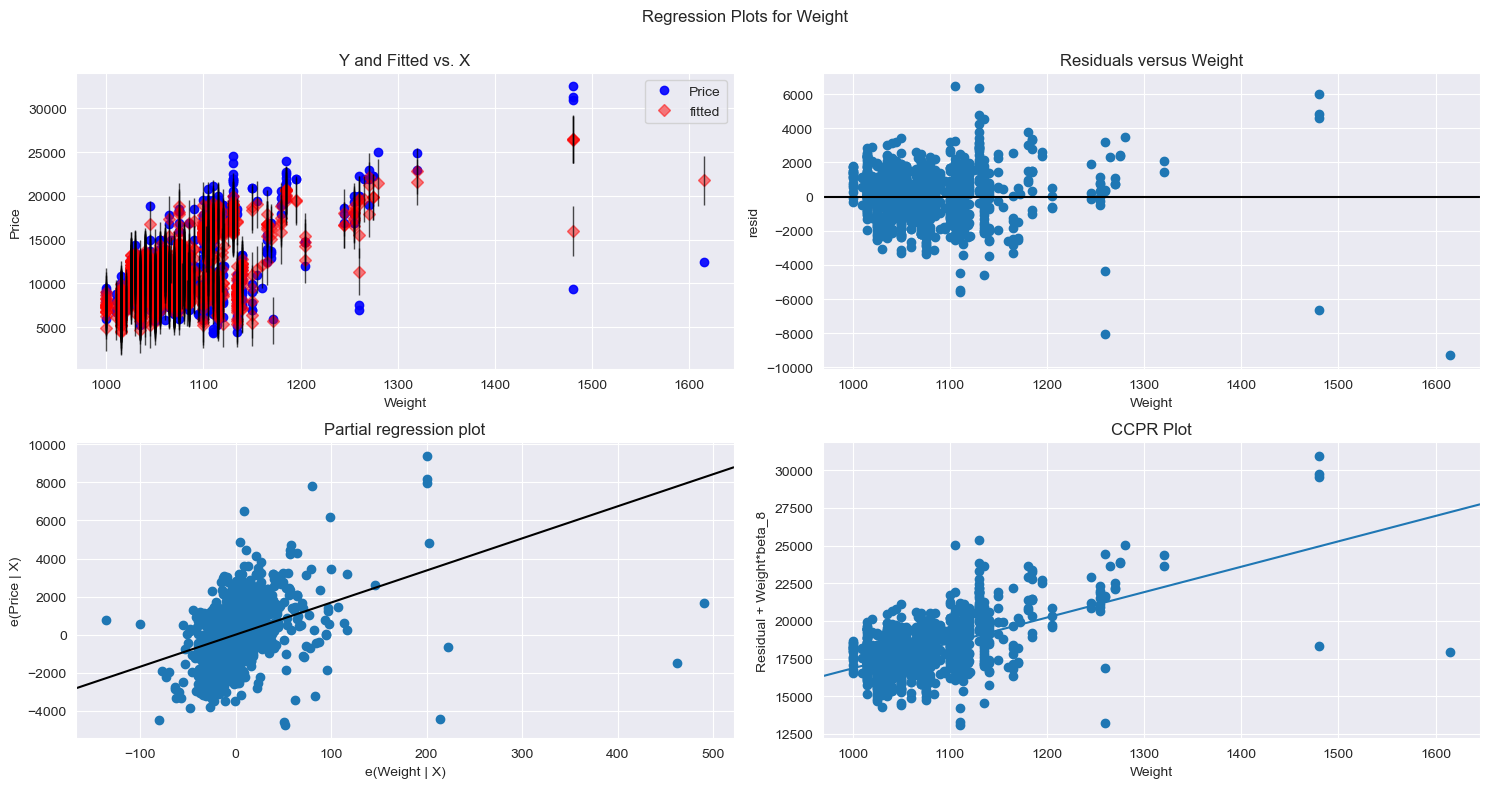

In [30]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

In [31]:
influence_points=model.get_influence()
c, p_value=influence_points.cooks_distance

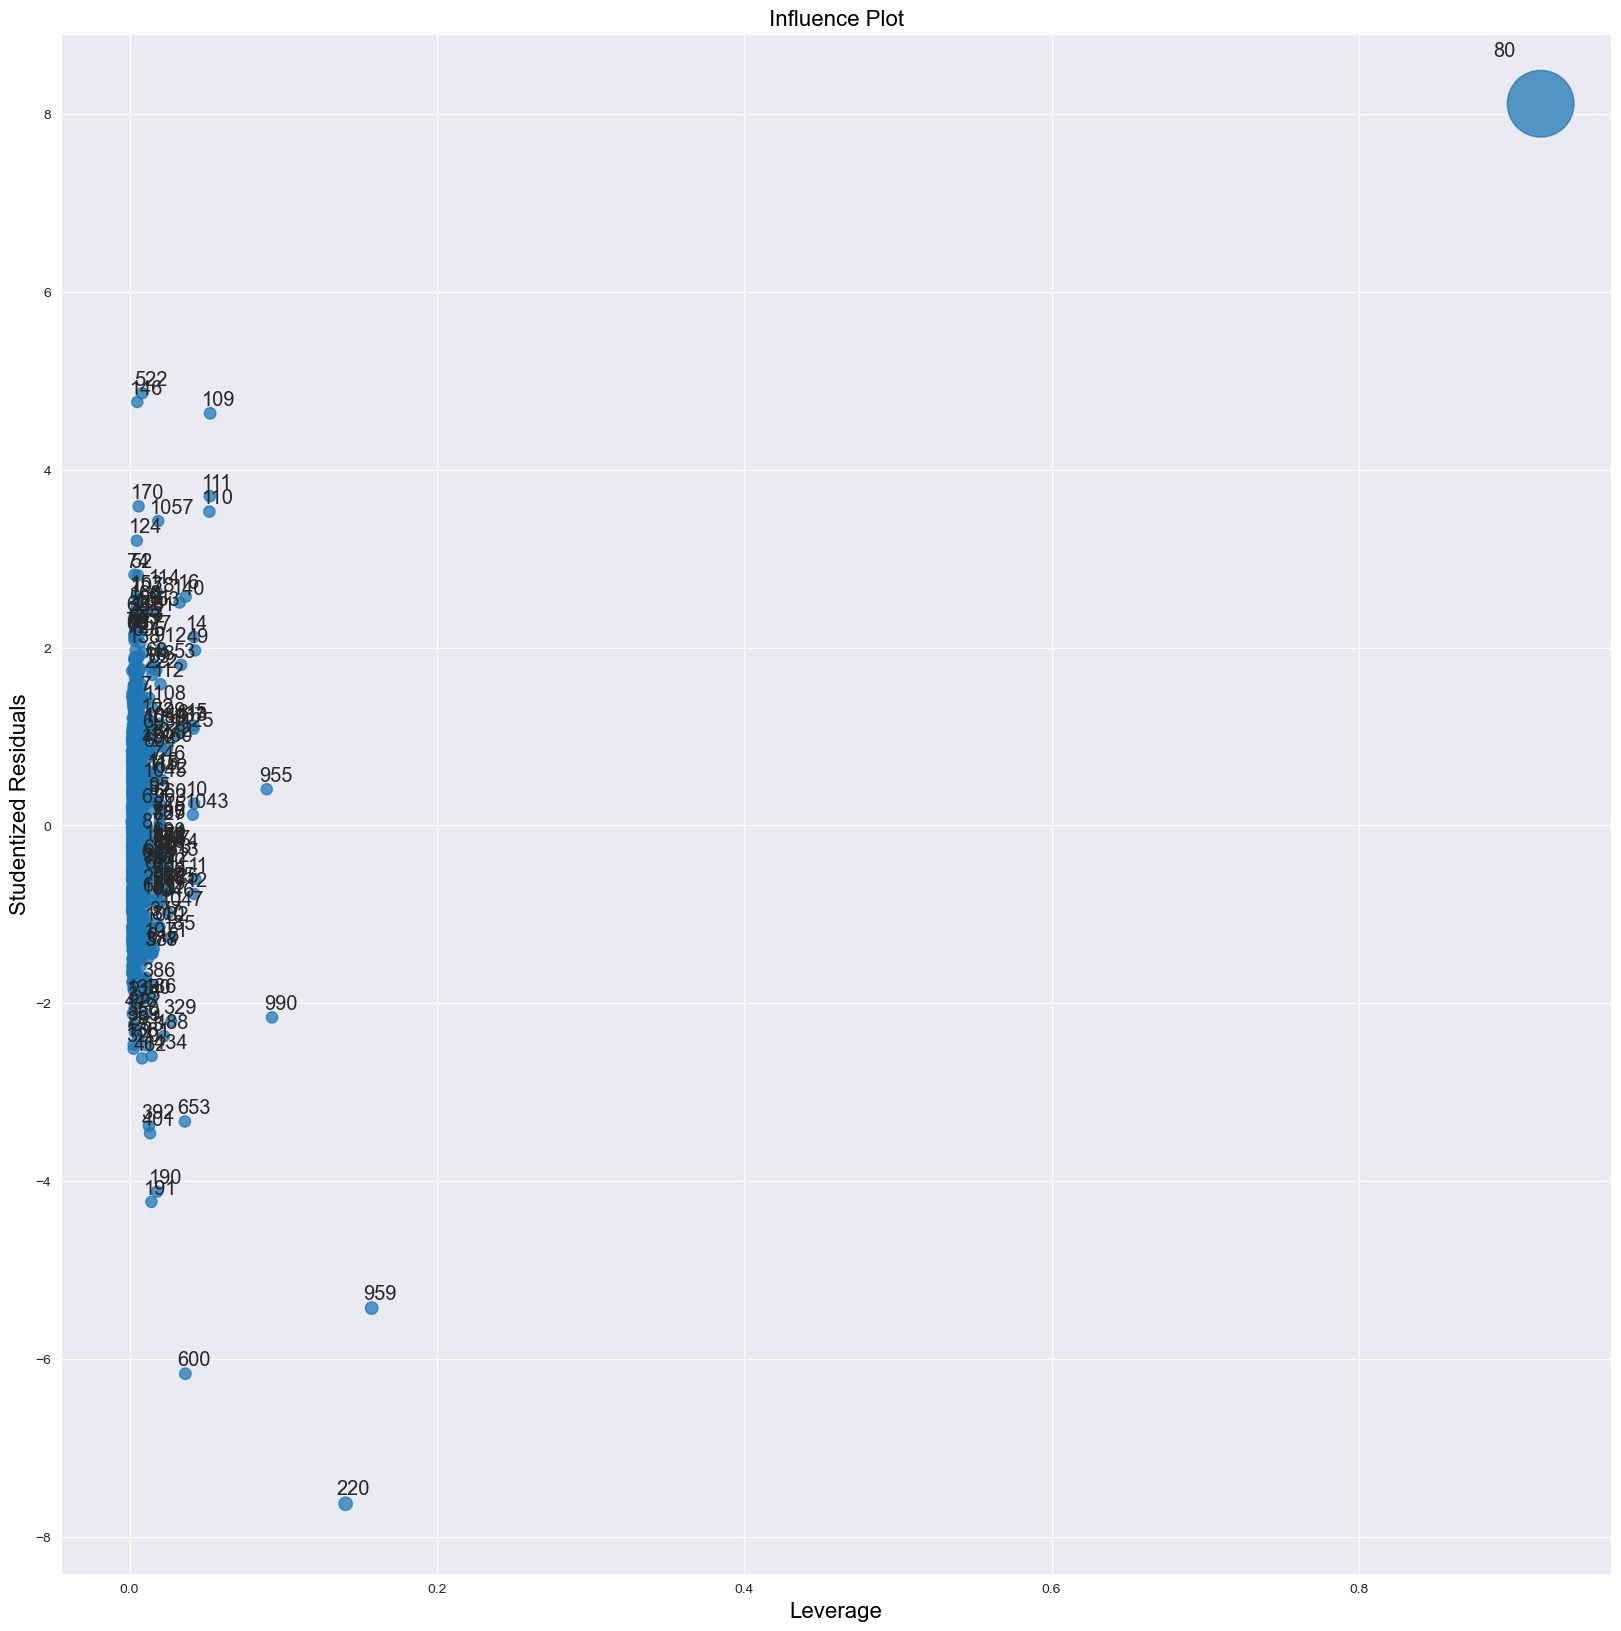

In [32]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)
plt.show()

In [33]:
k=toyo3.shape[1]
n=toyo3.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [34]:
toyo3[toyo3.index.isin([80])] 

Price  Age     KM   HP     CC  Doors  Gears   QT  Weight
80  18950   25  20019  110  16000      5      5  100    1180

In [35]:
toyo_new=toyo3.copy()
toyo_new

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1430   7500   69  20544   86  1300      3      5   69    1025
1431  10845   72  19000   86  1300      3      5   69    1015
1432   8500   71  17016   86  1300      3      5   69    1015
1433   7250   70  16916   86  1300      3      5   69    1015
1434   6950   76      1  110  1600      5      5   19    1114

[1435 rows x 9 columns]

In [36]:
toyo4=toyo_new.drop(toyo_new.index[[80]],axis=0).reset_index(drop=True)
toyo4

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1429   7500   69  20544   86  1300      3      5   69    1025
1430  10845   72  19000   86  1300      3      5   69    1015
1431   8500   71  17016   86  1300      3      5   69    1015
1432   7250   70  16916   86  1300      3      5   69    1015
1433   6950   76      1  110  1600      5      5   19    1114

[1434 rows x 9 columns]

In [37]:
model.rsquared

0.8625200256947001

In [38]:
toyo4

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1429   7500   69  20544   86  1300      3      5   69    1025
1430  10845   72  19000   86  1300      3      5   69    1015
1431   8500   71  17016   86  1300      3      5   69    1015
1432   7250   70  16916   86  1300      3      5   69    1015
1433   6950   76      1  110  1600      5      5   19    1114

[1434 rows x 9 columns]

In [39]:
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

Age     KM  HP    CC  Doors  Gears  QT  Weight
0   12  40000  80  1300      4      5  69    1012

In [40]:
model.predict(new_data)

0    14918.929348
dtype: float64

In [41]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=model.predict(toyo4)
pred_y

0       16791.958871
1       16253.800414
2       16779.635210
3       16405.789389
4       16200.217277
            ...     
1429     8794.255037
1430     8292.577342
1431     8455.434402
1432     8579.222041
1433    10396.087526
Length: 1434, dtype: float64

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [43]:
df1=pd.read_csv('50_Startups.csv')

In [44]:
df1.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [45]:
print('Number of Rows{}Columns'.format(df1.shape))

Number of Rows(50, 5)Columns


In [46]:
df1.describe()

R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [48]:

df=df1.rename(columns={"R&D Spend":'RnD',"Administration":'admin',"Marketing Spend":'marketing'})
df.head()

RnD      admin  marketing       State     Profit
0  165349.20  136897.80  471784.10    New York  192261.83
1  162597.70  151377.59  443898.53  California  191792.06
2  153441.51  101145.55  407934.54     Florida  191050.39
3  144372.41  118671.85  383199.62    New York  182901.99
4  142107.34   91391.77  366168.42     Florida  166187.94

In [49]:
df.isnull().sum()

RnD          0
admin        0
marketing    0
State        0
Profit       0
dtype: int64

In [50]:
df[df.values==0.0]

RnD      admin  marketing       State     Profit
19  86419.70  153514.11       0.00    New York  122776.86
47      0.00  135426.92       0.00  California   42559.73
47      0.00  135426.92       0.00  California   42559.73
48    542.05   51743.15       0.00    New York   35673.41
49      0.00  116983.80   45173.06  California   14681.40

In [51]:
print('Zero Values in R&D Spend is',(df['RnD'] == 0).sum(),'\n'
      'Zero Values in Administration is',(df['admin'] == 0).sum(),'\n'
      'Zero Values in Marketing is',(df['marketing'] == 0).sum(),'\n'
      'Zero Values in Profit is',(df['Profit'] == 0).sum())

Zero Values in R&D Spend is 2 
Zero Values in Administration is 0 
Zero Values in Marketing is 3 
Zero Values in Profit is 0


<Axes: >

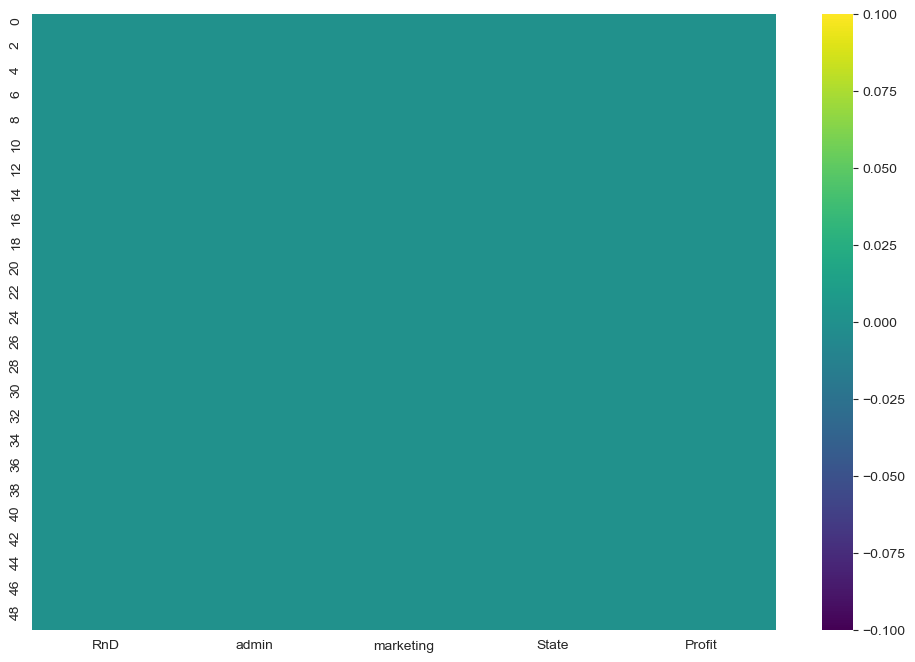

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cmap='viridis')

In [53]:
df[df.duplicated()].shape

(0, 5)

In [54]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [55]:
df[df.duplicated()]

Empty DataFrame
Columns: [RnD, admin, marketing, State, Profit]
Index: []

In [56]:
continuous_feature=[feature for feature in df.columns if df[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


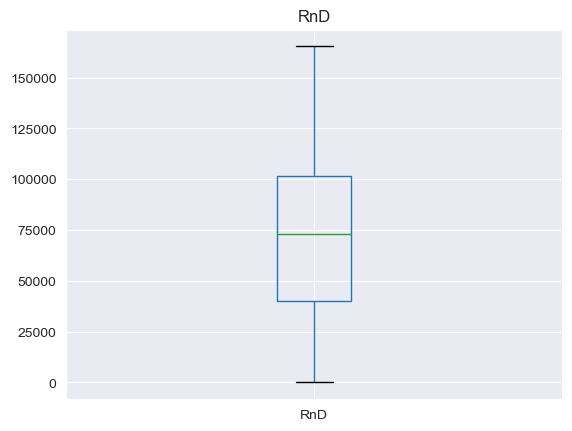

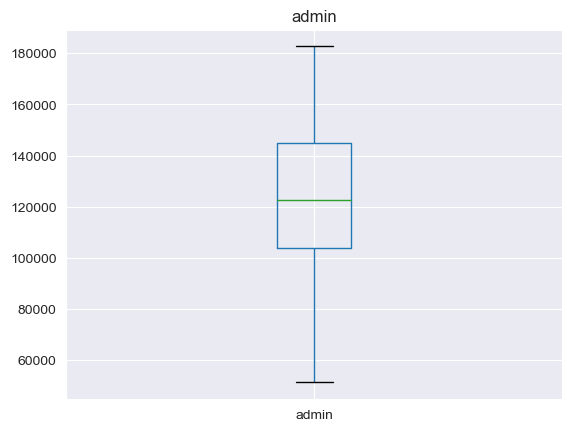

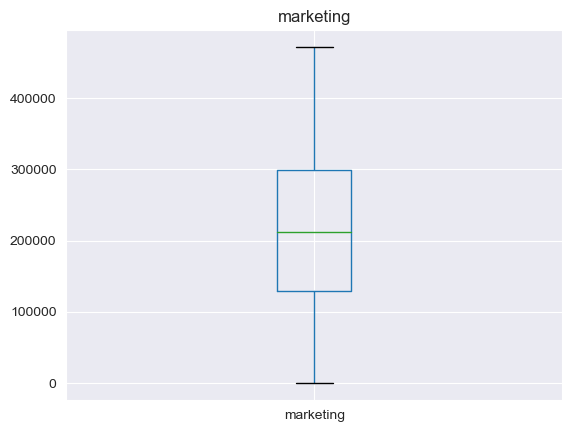

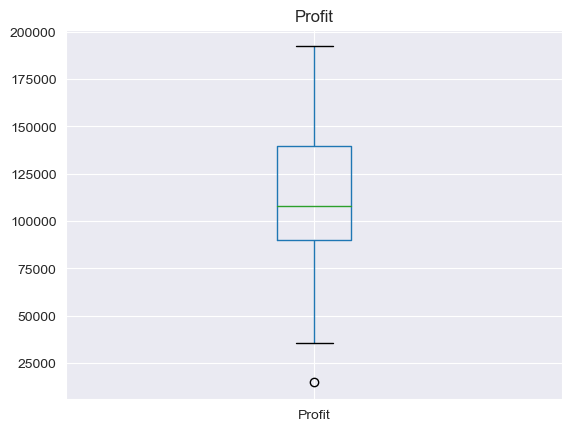

In [57]:
for feature in continuous_feature:
    data=df.copy()  
    data.boxplot(column=feature)
    plt.title(feature)
    plt.show()

In [58]:
Q1 = np.quantile(df.Profit,0.25)
Q3 = np.quantile(df.Profit,0.75)
med = np.median(df.Profit)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
print('First Quantile=', Q1,'\n' 'Second Quantile=', med,'\n' 'Third Quantile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper Whisker=', upper_bound,'\n' 'Lower Whisker=', lower_bound)

First Quantile= 90138.9025 
Second Quantile= 107978.19 
Third Quantile= 139765.97749999998 
Inter-Quartile Range= 49627.07499999998 
Upper Whisker= 214206.58999999997 
Lower Whisker= 15698.290000000023


In [59]:
Outliers = df.Profit[(df.Profit <= lower_bound) | (df.Profit >= upper_bound)]
print('The outlier in the boxplot:',Outliers)

The outlier in the boxplot: 49    14681.4
Name: Profit, dtype: float64


In [60]:
display(df[df.index.isin([49])],df.head())

RnD     admin  marketing       State   Profit
49  0.0  116983.8   45173.06  California  14681.4

RnD      admin  marketing       State     Profit
0  165349.20  136897.80  471784.10    New York  192261.83
1  162597.70  151377.59  443898.53  California  191792.06
2  153441.51  101145.55  407934.54     Florida  191050.39
3  144372.41  118671.85  383199.62    New York  182901.99
4  142107.34   91391.77  366168.42     Florida  166187.94

{'whiskers': [<matplotlib.lines.Line2D at 0x28ea9931050>,
 'caps': [<matplotlib.lines.Line2D at 0x28ea99311d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28ea9931610>],
 'medians': [<matplotlib.lines.Line2D at 0x28ea9931f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x28ea9921550>],
 'means': []}

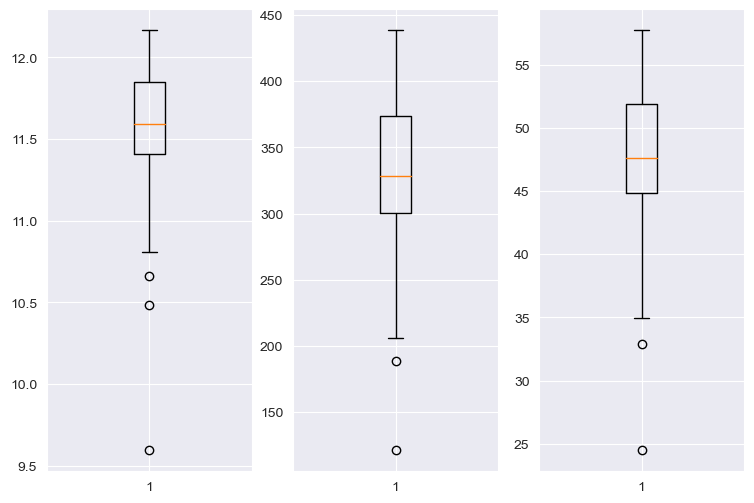

In [61]:
plt.subplots(figsize = (9,6))
plt.subplot(131)
plt.boxplot(np.log(df['Profit']))
plt.subplot(132)
plt.boxplot(np.sqrt(df['Profit']))
plt.subplot(133)
plt.boxplot(np.cbrt(df['Profit']))

In [62]:
model=sm.ols("Profit~RnD+admin+marketing",data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           4.53e-30
Time:                        19:43:21   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD            0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
model.rsquared

0.9507459940683246

In [64]:
model.rsquared_adj

0.9475337762901719

In [65]:
df.Profit.median()

107978.19

Text(0.5, 1.0, 'Profit before median imputation')

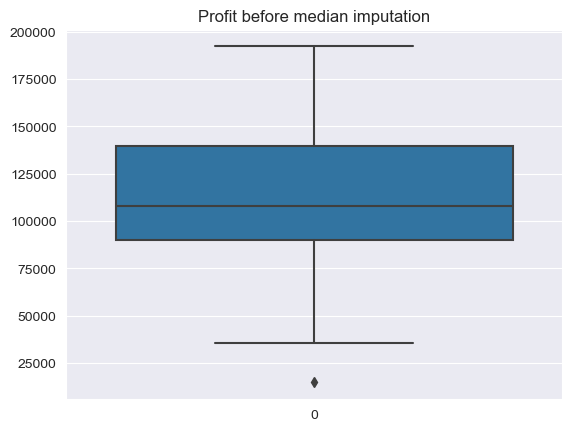

In [66]:
sns.boxplot(df['Profit'])
plt.title('Profit before median imputation')

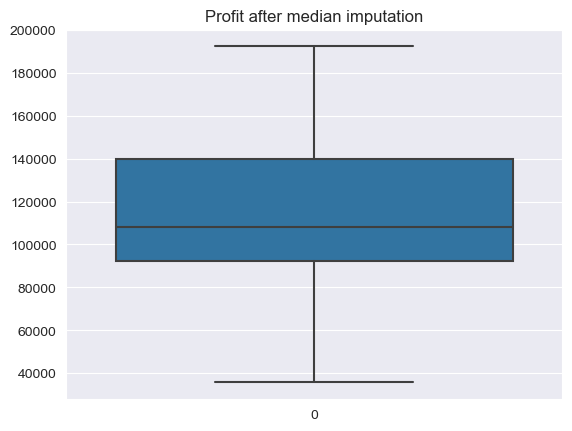

In [68]:
for i in df1['Profit']:
    q1 = np.quantile(df.Profit,0.25)
    q3 = np.quantile(df.Profit,0.75)
    med = np.median(df.Profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Profit'] = df1['Profit'].replace(i, np.median(df1['Profit']))
sns.boxplot(df1['Profit'])
plt.title('Profit after median imputation')
plt.show()

In [71]:
after_median_imputation_model = sm.ols("Profit~RnD+admin+marketing", data = df).fit()
after_median_imputation_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           4.53e-30
Time:                        19:51:21   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD            0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

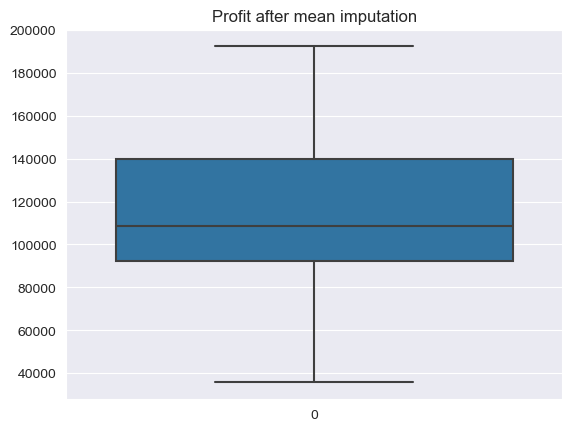

In [74]:
df2=df.copy()
for i in df2['Profit']:
    q1 = np.quantile(df2.Profit,0.25)
    q3 = np.quantile(df2.Profit,0.75)
    med = np.median(df2.Profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Profit'] = df2['Profit'].replace(i, np.mean(df2['Profit']))
sns.boxplot(df2['Profit'])
plt.title('Profit after mean imputation')
plt.show()

In [75]:
after_mean_imputation_model = sm.ols("Profit~RnD+admin+marketing", data = df2).fit()
# Finding rsquared values
after_mean_imputation_model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     158.8
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           2.82e-24
Time:                        19:53:00   Log-Likelihood:                -536.67
No. Observations:                  50   AIC:                             1081.
Df Residuals:                      46   BIC:                             1089.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.619e+04   8236.731      6.822      0.000    3.96e+04    7.28e+04
RnD            0.7447      0.057     13.162      0.000       0.631       0.859
admin         -0.0144      0.064     -0.226      0.823      -0.143       0.114
marketing      0.0219      0.021      1.061      0.294      -0.020       0.063
==============================================================================
Omnibus:                       50.346   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.669
Skew:                           2.466   Prob(JB):                     1.55e-67
Kurtosis:                      14.107   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
df3=df.copy()
def drop_outliers(data, field_name):
    iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)

Text(0.5, 1.0, 'Profit after removing outliers')

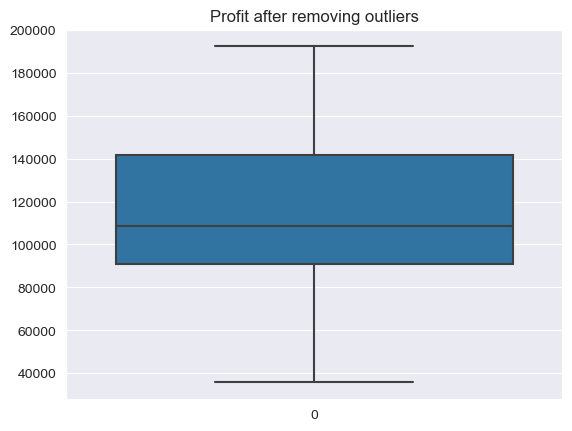

In [79]:
drop_outliers(df3, 'Profit')
sns.boxplot(df3.Profit)
plt.title('Profit after removing outliers')

In [80]:
removed_outlier_model = sm.ols("Profit~RnD+admin+marketing", data = df3).fit()
# Finding rsquared values
removed_outlier_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           8.85e-32
Time:                        19:54:54   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RnD            0.7830      0.038     20.470      0.000       0.706       0.860
admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
marketing      0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)

Text(0.5, 1.0, 'Profit')

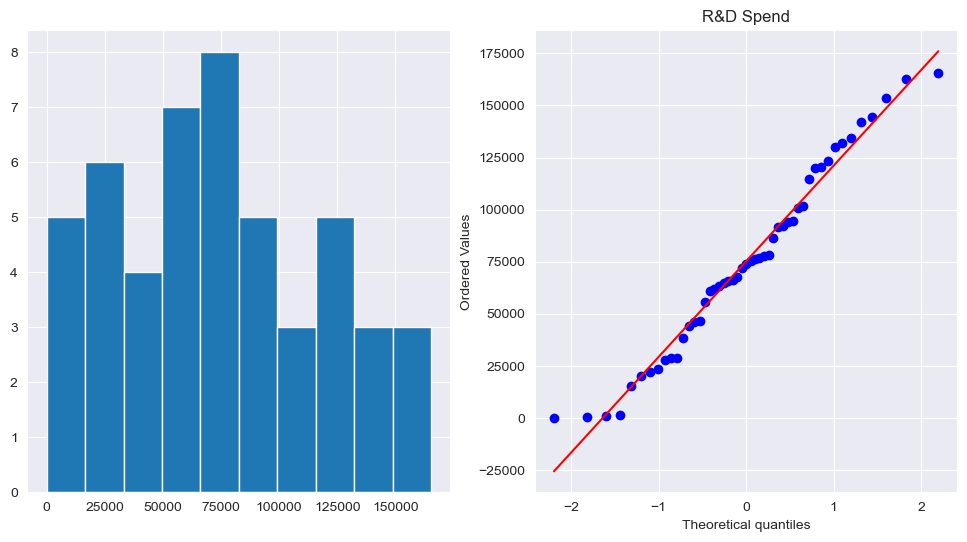

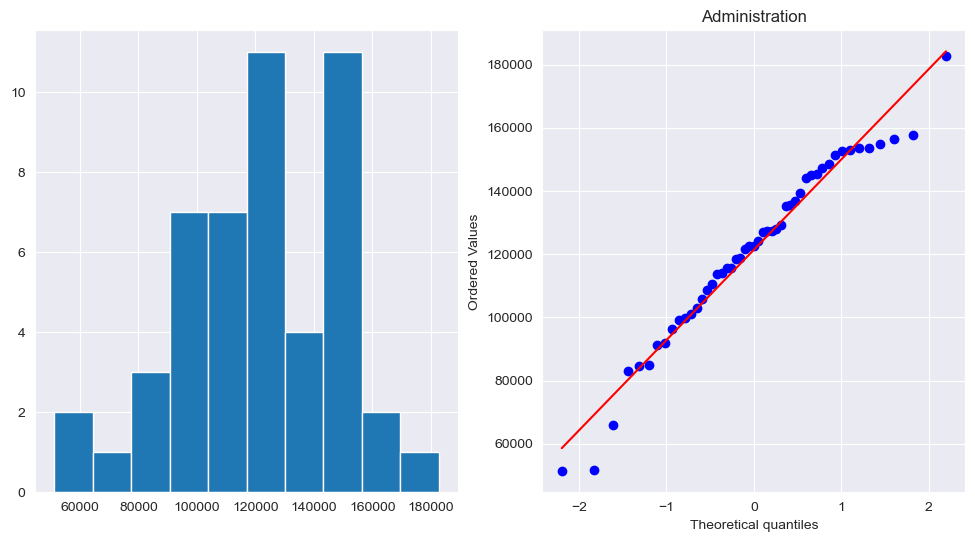

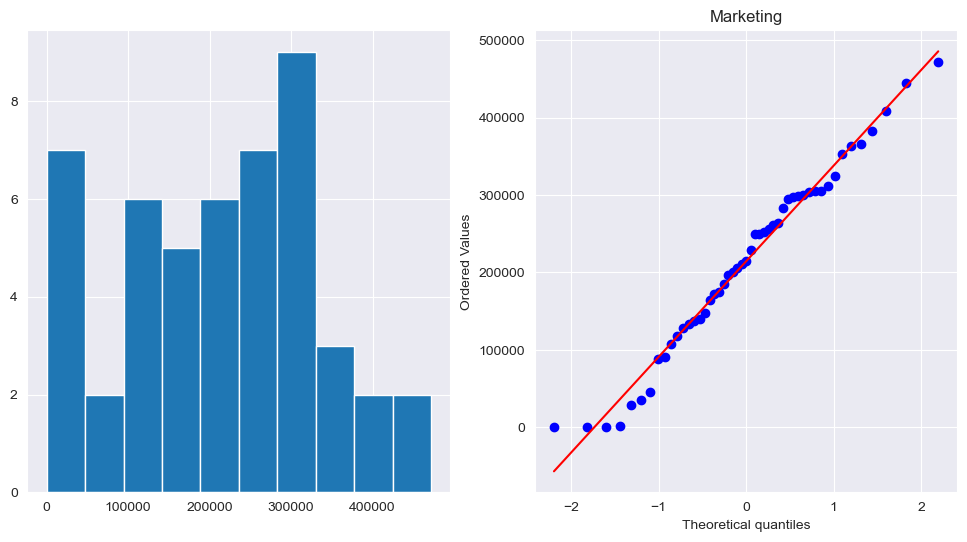

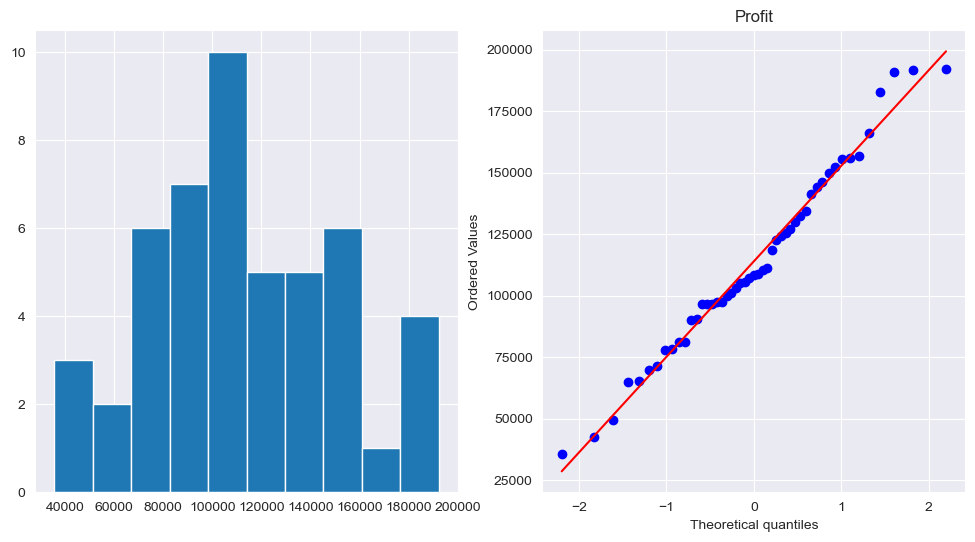

In [82]:
plot_data(df3,'RnD')
plt.title('R&D Spend')
plot_data(df3,'admin')
plt.title('Administration')
plot_data(df3,'marketing')
plt.title('Marketing')
plot_data(df3,'Profit')
plt.title('Profit')

Text(0.5, 1.0, 'Profit')

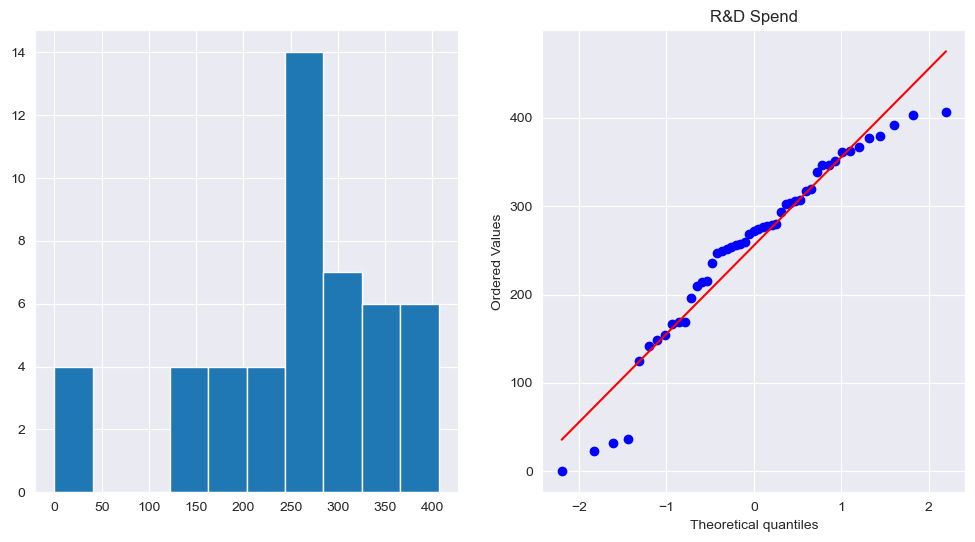

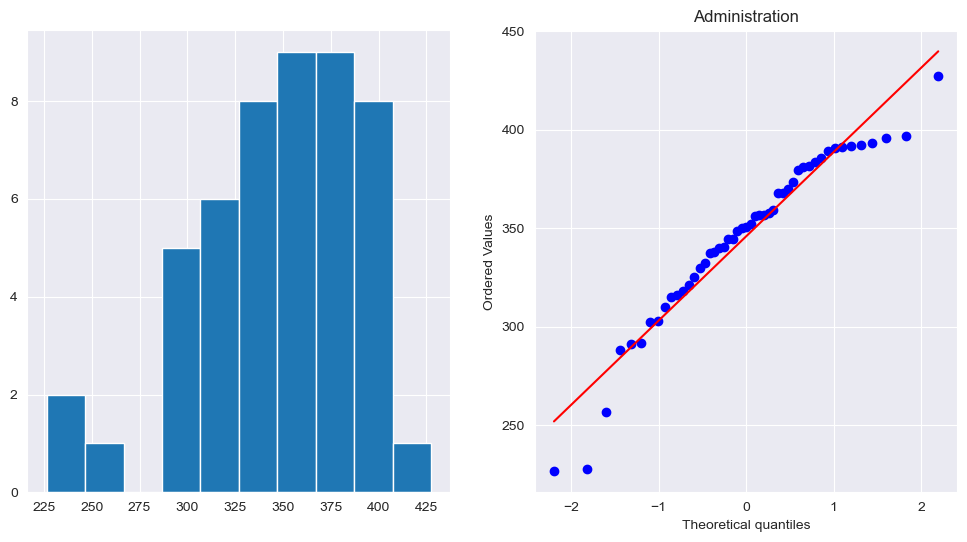

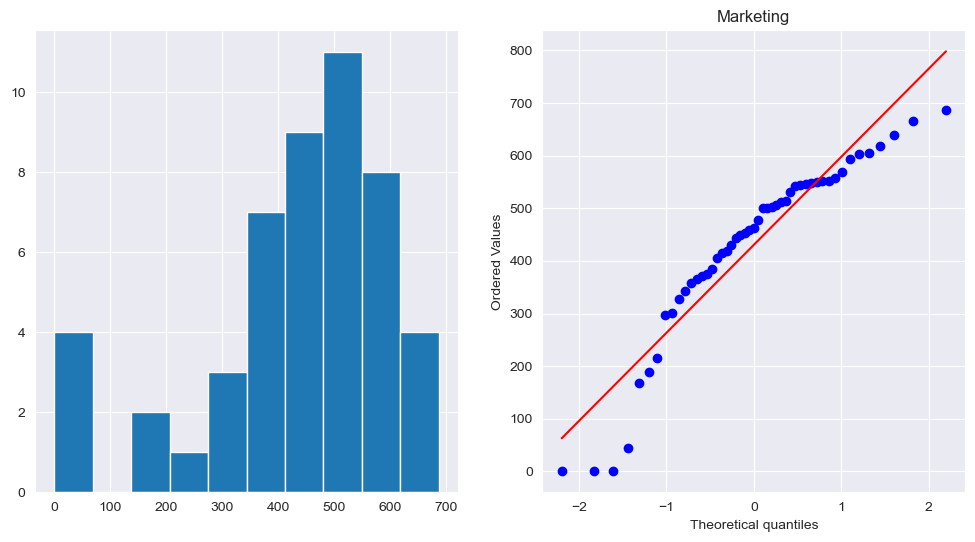

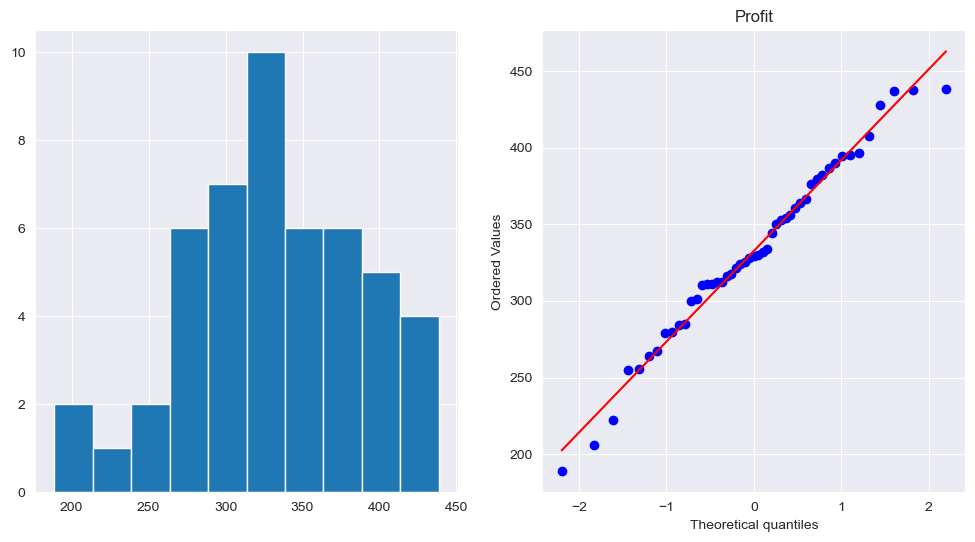

In [83]:
df_sqrt=df3.copy()
df_sqrt[continuous_feature]=np.sqrt(df_sqrt[continuous_feature])

plot_data(df_sqrt,'RnD')
plt.title('R&D Spend')
plot_data(df_sqrt,'admin')
plt.title('Administration')
plot_data(df_sqrt,'marketing')
plt.title('Marketing')
plot_data(df_sqrt,'Profit')
plt.title('Profit')

Text(0.5, 1.0, 'Profit')

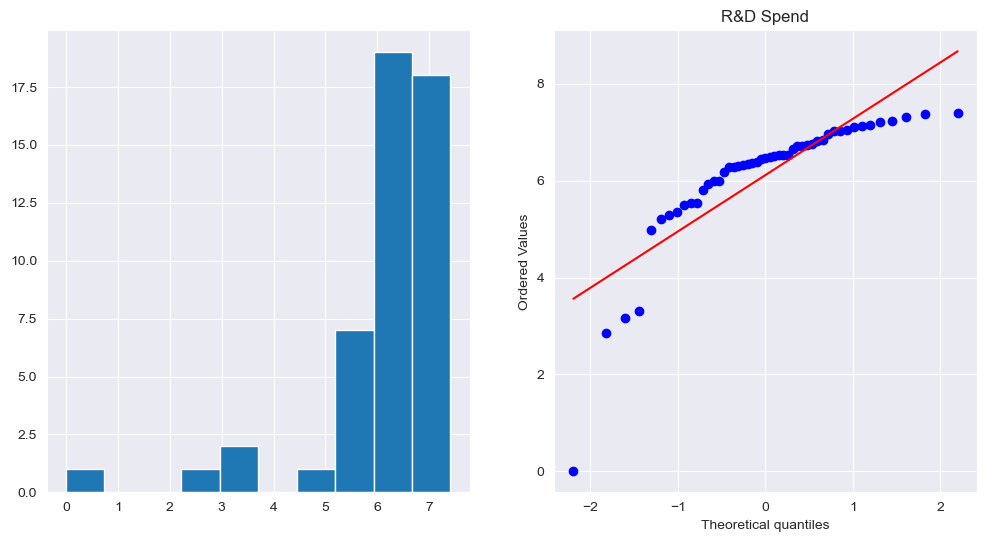

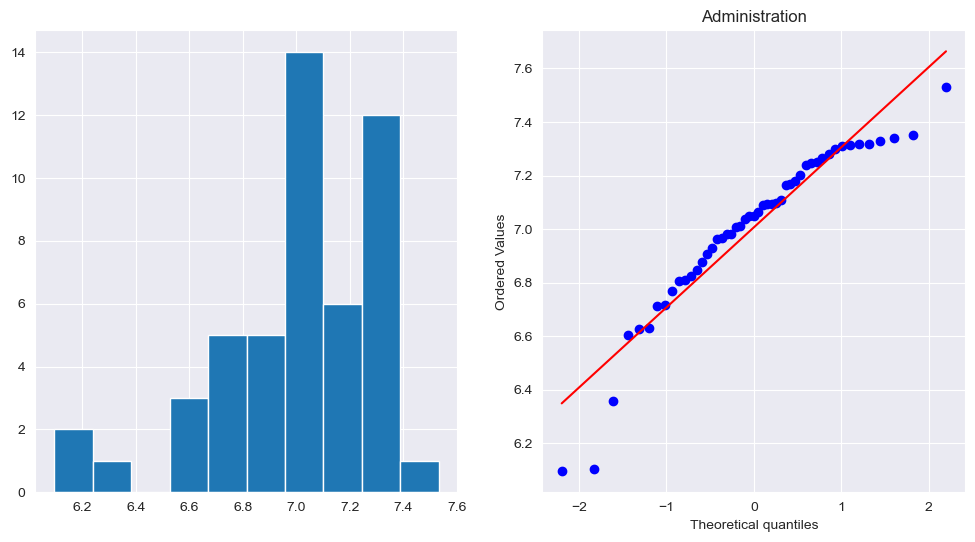

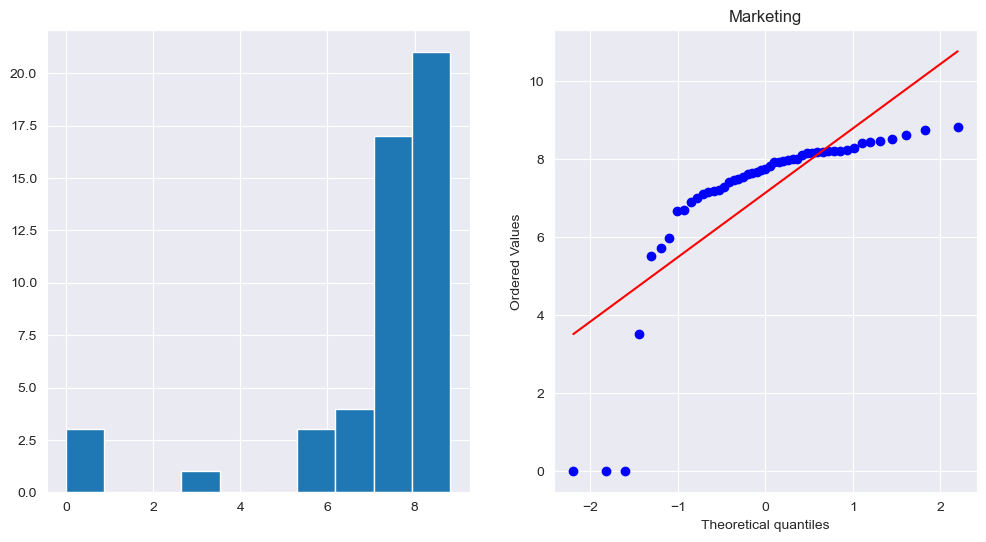

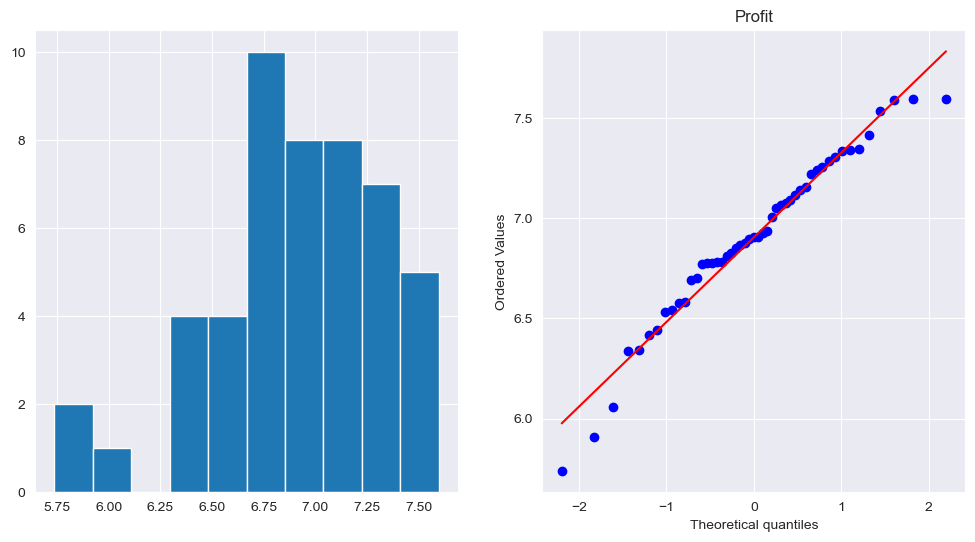

In [85]:
df_cbrt=df3.copy()
df_cbrt[continuous_feature]=np.cbrt(df_sqrt[continuous_feature])

plot_data(df_cbrt,'RnD')
plt.title('R&D Spend')
plot_data(df_cbrt,'admin')
plt.title('Administration')
plot_data(df_cbrt,'marketing')
plt.title('Marketing')
plot_data(df_cbrt,'Profit')
plt.title('Profit')

<Axes: ylabel='count'>

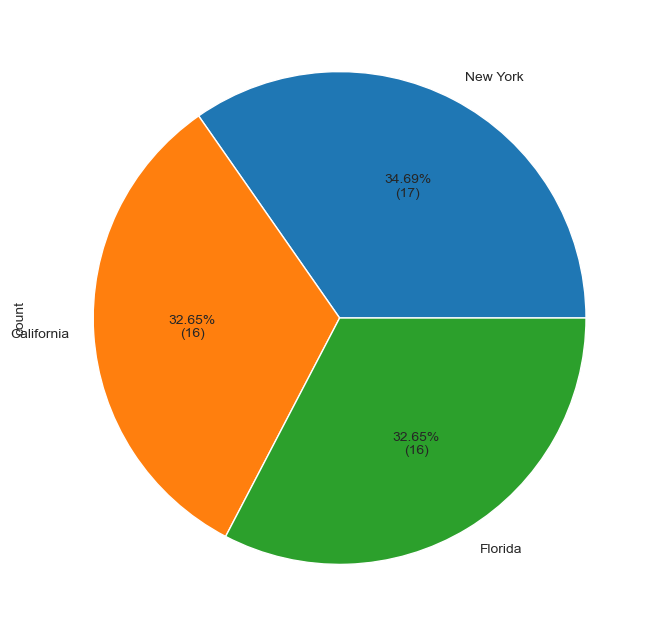

In [88]:
plt.figure(figsize=(8,8))
df3['State'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df3['State'].value_counts().sum())))

In [90]:
df3.State.value_counts()

State
New York      17
California    16
Florida       16
Name: count, dtype: int64

In [91]:
df3.columns

Index(['RnD', 'admin', 'marketing', 'State', 'Profit'], dtype='object')

In [92]:
from scipy.stats import shapiro

In [93]:
print('R&D Spend feature',shapiro(df3.RnD),'\n'
     'Administration feature',shapiro(df3.admin),'\n'
     'Marketing Spend feature',shapiro(df3.marketing),'\n'
     'Profit feature',shapiro(df3.Profit))

R&D Spend feature ShapiroResult(statistic=0.9705320596694946, pvalue=0.25422945618629456) 
Administration feature ShapiroResult(statistic=0.9695430994033813, pvalue=0.23222042620182037) 
Marketing Spend feature ShapiroResult(statistic=0.9757171273231506, pvalue=0.4016808867454529) 
Profit feature ShapiroResult(statistic=0.9793393015861511, pvalue=0.5378792881965637)


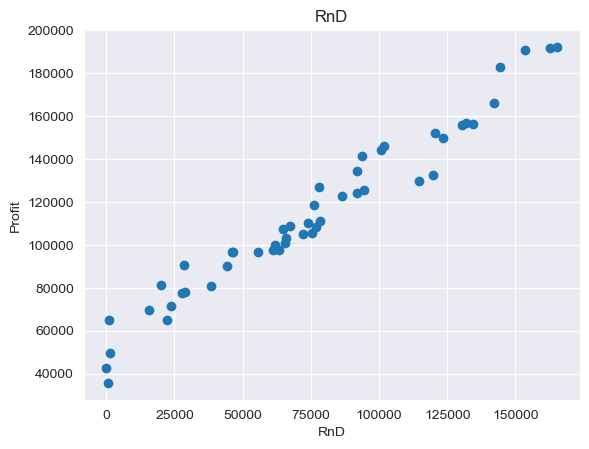

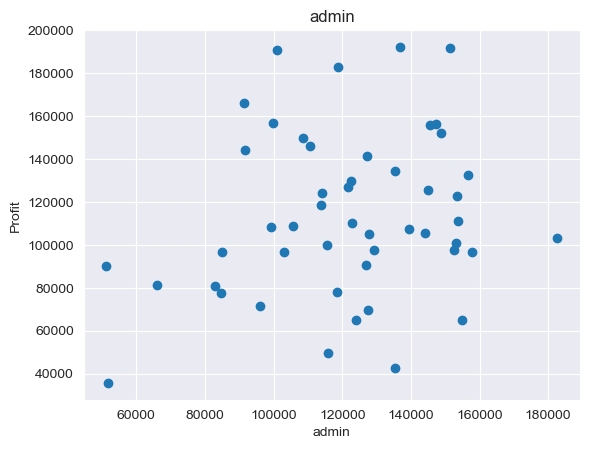

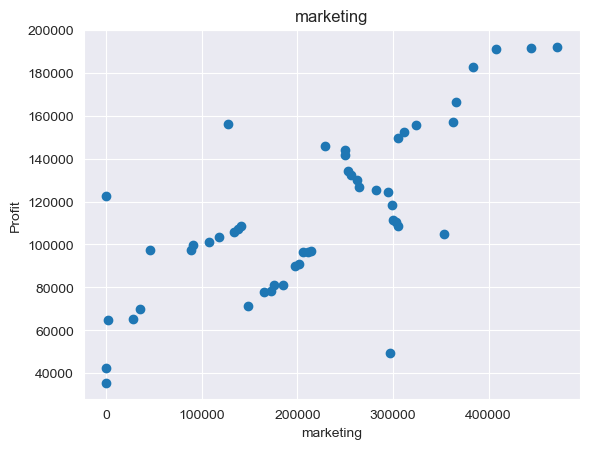

In [94]:
for feature in continuous_feature:
    if feature!="Profit":
        data=df3.copy()         
        plt.scatter(data[feature],data['Profit'])
        plt.xlabel(feature)
        plt.ylabel('Profit')
        plt.title(feature)
        plt.show()

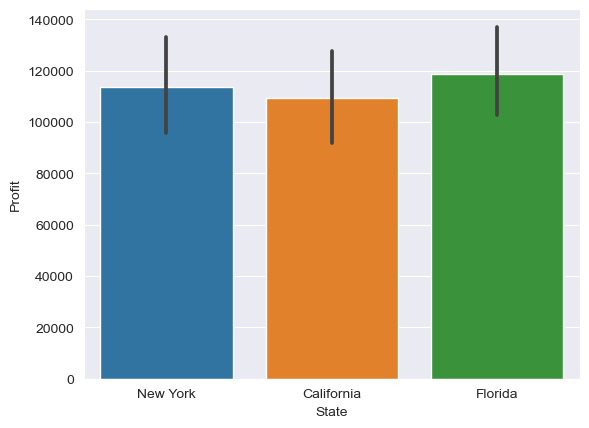

In [97]:
a = sns.barplot(x = "State", y = 'Profit', data = df3)
for i in ax.containers:
    a.bar_label(i,)

In [98]:
df4=df3.drop('State',axis=1)
df4.head()

RnD      admin  marketing     Profit
0  165349.20  136897.80  471784.10  192261.83
1  162597.70  151377.59  443898.53  191792.06
2  153441.51  101145.55  407934.54  191050.39
3  144372.41  118671.85  383199.62  182901.99
4  142107.34   91391.77  366168.42  166187.94

In [99]:
df4.corr()

RnD     admin  marketing    Profit
RnD        1.000000  0.243438   0.711654  0.978437
admin      0.243438  1.000000  -0.037280  0.205841
marketing  0.711654 -0.037280   1.000000  0.739307
Profit     0.978437  0.205841   0.739307  1.000000

<Axes: >

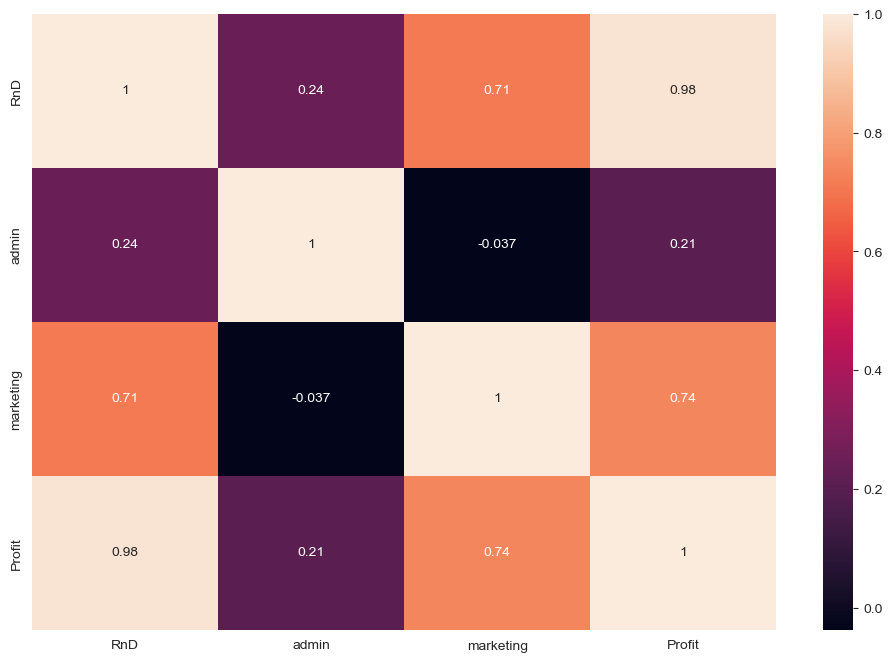

In [100]:
plt.figure(figsize=(12,8))
sns.heatmap(
    df4.corr(),
    annot=True)

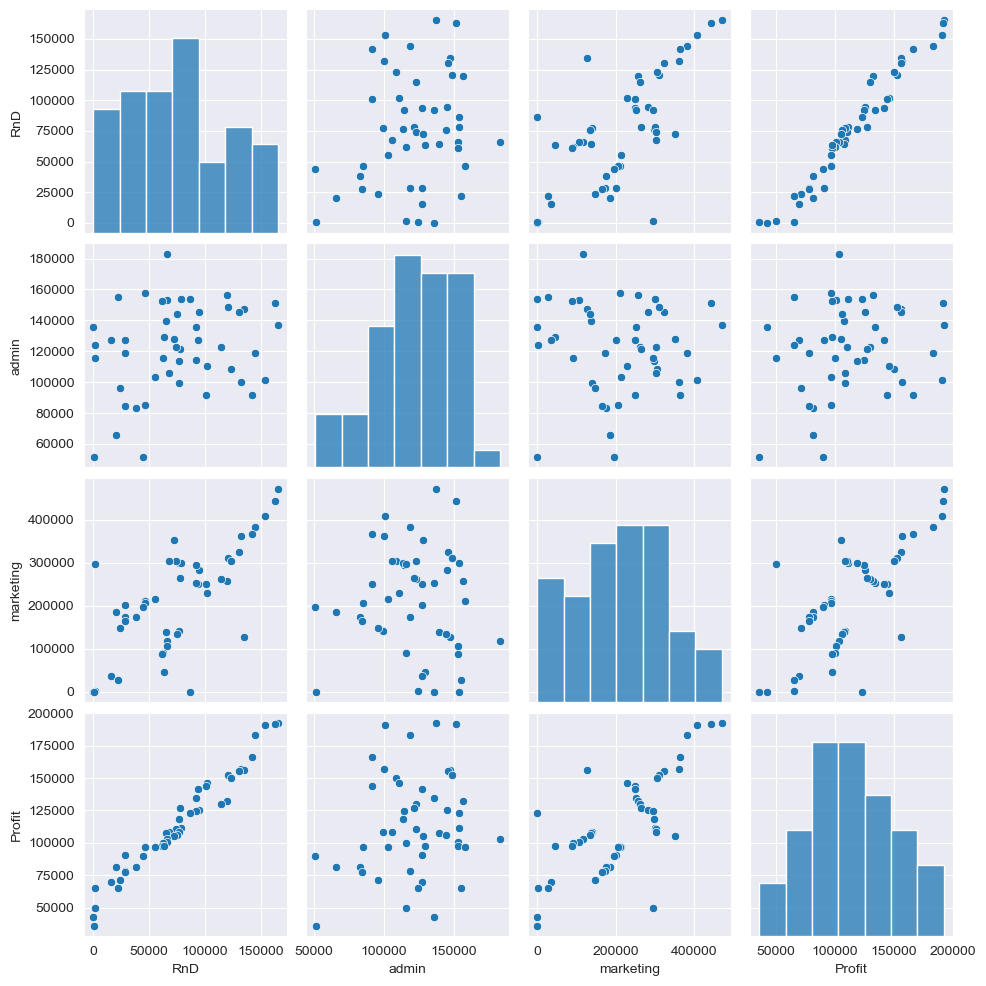

In [101]:
sns.set_style(style='darkgrid')
sns.pairplot(df4)

In [102]:
df_standard_scaled = df4.copy()
features = df_standard_scaled[continuous_feature]

In [104]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_standard_scaled[continuous_feature]=scaler.fit_transform(features.values)
df_standard_scaled.head()


RnD     admin  marketing    Profit
0  2.018325  0.552080   2.146120  2.071556
1  1.956704  1.069017   1.913596  2.059122
2  1.751650 -0.724297   1.613709  2.039490
3  1.548545 -0.098597   1.407457  1.823808
4  1.497818 -1.072513   1.265442  1.381401

In [105]:
print('Mean''\n',np.round(df_standard_scaled.mean(),1),'\n' 'Standard Deviation','\n',np.round(df_standard_scaled.std()),1)

Mean
 RnD          0.0
admin       -0.0
marketing   -0.0
Profit      -0.0
dtype: float64 
Standard Deviation 
 RnD          1.0
admin        1.0
marketing    1.0
Profit       1.0
dtype: float64 1


In [107]:
import statsmodels.formula.api as sm
model = sm.ols("Profit~RnD+admin+marketing", data = df_standard_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           8.85e-32
Time:                        20:14:34   Log-Likelihood:                 10.154
No. Observations:                  49   AIC:                            -12.31
Df Residuals:                      45   BIC:                            -4.741
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.804e-16      0.029  -6.15e-15      1.000      -0.059       0.059
RnD            0.9254      0.045     20.470      0.000       0.834       1.017
admin         -0.0165      0.032     -0.518      0.607      -0.080       0.048
marketing      0.0801      0.044      1.825      0.075      -0.008       0.168
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
model.params

Intercept   -1.804112e-16
RnD          9.254411e-01
admin       -1.646059e-02
marketing    8.009988e-02
dtype: float64

In [109]:
display(np.round(model.tvalues,3),np.round(model.pvalues,3))

Intercept    -0.000
RnD          20.470
admin        -0.518
marketing     1.825
dtype: float64

Intercept    1.000
RnD          0.000
admin        0.607
marketing    0.075
dtype: float64

In [110]:
admin_slr_model=sm.ols("Profit~admin",data=df_standard_scaled).fit()

In [111]:
admin_slr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.080
Date:                Tue, 02 Apr 2024   Prob (F-statistic):              0.156
Time:                        20:17:24   Log-Likelihood:                -68.467
No. Observations:                  49   AIC:                             140.9
Df Residuals:                      47   BIC:                             144.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.527e-16      0.143  -1.07e-15      1.000      -0.287       0.287
admin          0.2058      0.143      1.442      0.156      -0.081       0.493
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                1.052
Skew:                           0.310   Prob(JB):                        0.591
Kurtosis:                       2.639   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
display(np.round(admin_slr_model.tvalues,3),np.round(admin_slr_model.pvalues,3))

Intercept   -0.000
admin        1.442
dtype: float64

Intercept    1.000
admin        0.156
dtype: float64

In [113]:
marketing_slr_model=sm.ols("Profit~marketing",data=df_standard_scaled).fit()

In [114]:
marketing_slr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     56.66
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           1.30e-09
Time:                        20:20:56   Log-Likelihood:                -50.150
No. Observations:                  49   AIC:                             104.3
Df Residuals:                      47   BIC:                             108.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.527e-16      0.098  -1.55e-15      1.000      -0.198       0.198
marketing      0.7393      0.098      7.527      0.000       0.542       0.937
==============================================================================
Omnibus:                        4.458   Durbin-Watson:                   1.140
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                4.096
Skew:                          -0.303   Prob(JB):                        0.129
Kurtosis:                       4.281   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
display(np.round(marketing_slr_model.tvalues,3),np.round(marketing_slr_model.pvalues,3))

Intercept   -0.000
marketing    7.527
dtype: float64

Intercept    1.0
marketing    0.0
dtype: float64

In [116]:
admin_plus_marketing=sm.ols('Profit~admin+marketing',data=df_standard_scaled).fit()
admin_plus_marketing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     34.66
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           6.59e-10
Time:                        20:23:54   Log-Likelihood:                -47.010
No. Observations:                  49   AIC:                             100.0
Df Residuals:                      46   BIC:                             105.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.527e-16      0.093  -1.64e-15      1.000      -0.187       0.187
admin          0.2337      0.093      2.508      0.016       0.046       0.421
marketing      0.7480      0.093      8.027      0.000       0.560       0.936
==============================================================================
Omnibus:                        6.637   Durbin-Watson:                   1.193
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                7.219
Skew:                          -0.454   Prob(JB):                       0.0271
Kurtosis:                       4.646   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
x = df4[['marketing','admin','RnD']]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values, i) for i in range(len(x.columns))]
vif_data.sort_values(by = ['VIF'])

Features       VIF
1      admin  4.218831
0  marketing  7.589312
2        RnD  8.602235

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
x = df4[['marketing','RnD']]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values, i) for i in range(len(x.columns))]
vif_data.sort_values(by = ['VIF'])

Features       VIF
1        RnD  7.186744
0  marketing  7.186744

In [119]:
admin_present_model= sm.ols('Profit~RnD+admin', data= df_standard_scaled).fit()
admin_present_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     530.6
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           1.69e-32
Time:                        20:25:37   Log-Likelihood:                 8.4042
No. Observations:                  49   AIC:                            -10.81
Df Residuals:                      46   BIC:                            -5.133
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.527e-16      0.030  -5.08e-15      1.000      -0.060       0.060
RnD            0.9868      0.031     31.847      0.000       0.924       1.049
admin         -0.0344      0.031     -1.110      0.273      -0.097       0.028
==============================================================================
Omnibus:                        0.444   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.245
Skew:                          -0.173   Prob(JB):                        0.885
Kurtosis:                       2.972   Cond. No.                         1.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

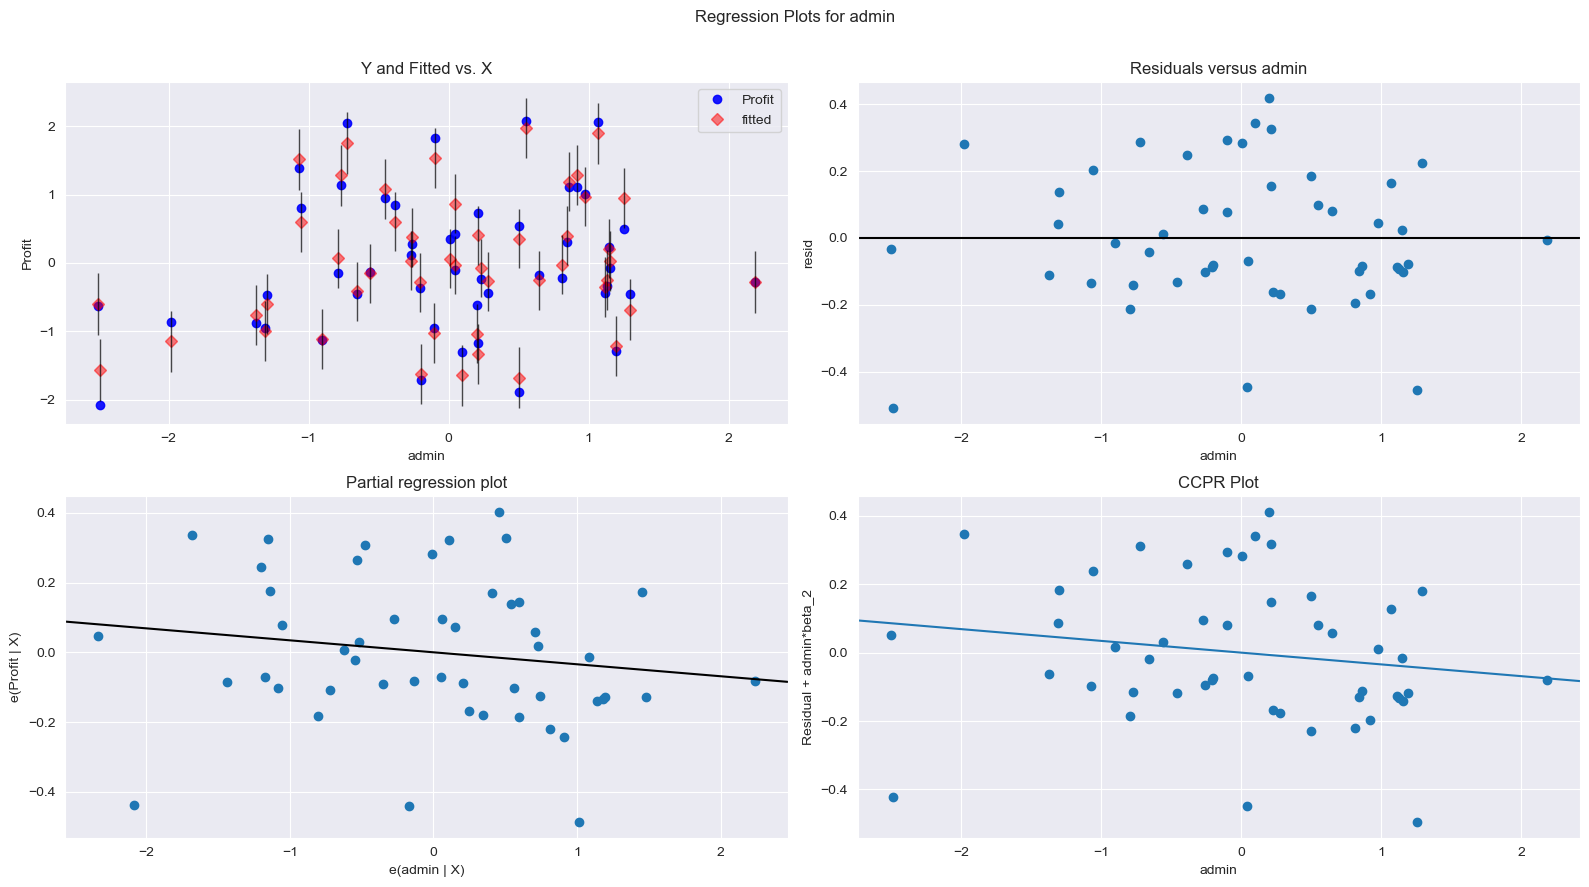

In [120]:
fig = plt.figure(figsize = (16,9))
smf.graphics.plot_regress_exog(admin_present_model, 'admin', fig=fig)
plt.show()

In [121]:
marketing_present_model= sm.ols('Profit~RnD+marketing', data= df_standard_scaled).fit()
marketing_present_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           3.74e-33
Time:                        20:26:13   Log-Likelihood:                 10.009
No. Observations:                  49   AIC:                            -14.02
Df Residuals:                      46   BIC:                            -8.342
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.527e-16      0.029  -5.25e-15      1.000      -0.059       0.059
RnD            0.9164      0.041     22.136      0.000       0.833       1.000
marketing      0.0871      0.041      2.104      0.041       0.004       0.170
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
only_RnD_model= sm.ols('Profit~RnD', data= df_standard_scaled).fit()
only_RnD_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           7.56e-34
Time:                        20:27:12   Log-Likelihood:                 7.7569
No. Observations:                  49   AIC:                            -11.51
Df Residuals:                      47   BIC:                            -7.730
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.527e-16      0.030  -5.07e-15      1.000      -0.061       0.061
RnD            0.9784      0.030     32.477      0.000       0.918       1.039
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

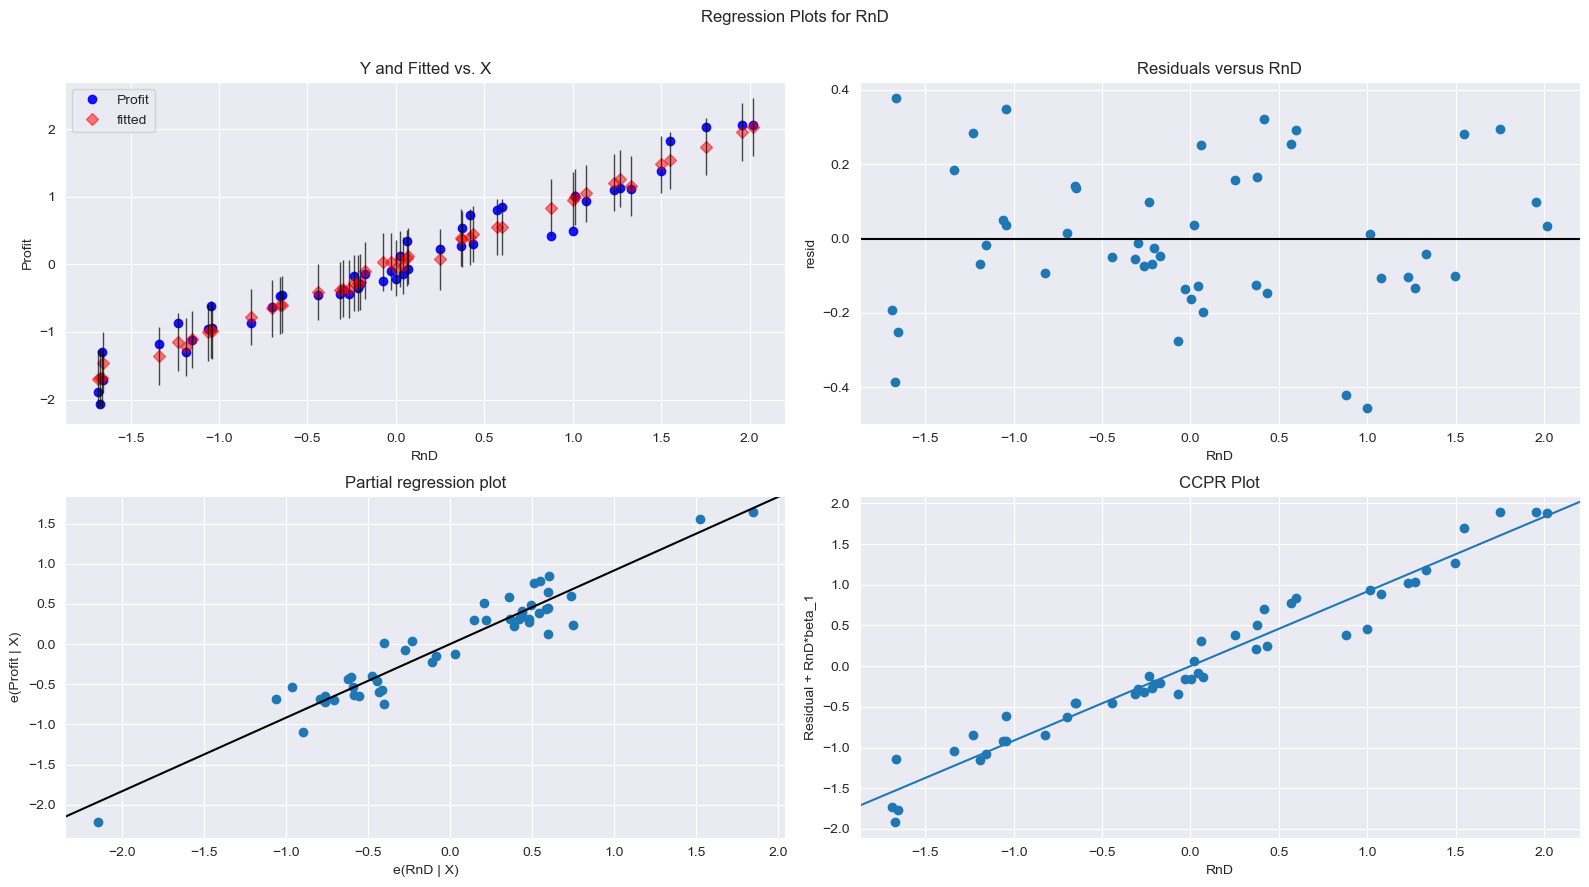

In [123]:
fig = plt.figure(figsize = (16,9))
smf.graphics.plot_regress_exog(marketing_present_model, 'RnD', fig=fig)
plt.show()

In [125]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [126]:
df4.columns

Index(['RnD', 'admin', 'marketing', 'Profit'], dtype='object')

In [128]:
x = df4.drop('Profit', axis = 1).values
y = df4.iloc[:,3:].values.reshape(-1,1)
print("Shape of x: ",x.shape)
print("Shape of y:",y.shape)

Shape of x:  (49, 3)
Shape of y: (49, 1)


In [129]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (36, 3)
Shape of X_test:  (13, 3)
Shape of y_train:  (36, 1)
Shape of y_test (13, 1)


In [130]:
from sklearn.preprocessing import StandardScaler

#Scaling 
transformer_x = StandardScaler().fit(x_train)
transformer_y = StandardScaler().fit(y_train) 
x_train_scal = transformer_x.transform(x_train)
x_test_scal = transformer_x.transform(x_test)
y_train_scal = transformer_y.transform(y_train)
y_test_scal = transformer_y.transform(y_test)

#Linear Regression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train_scal, y_train_scal)

LinearRegression()

In [131]:
X_test_scaled = transformer_x.transform(x_test)
prediction = regressor_linear.predict(X_test_scaled)
prediction_unscaled = transformer_y.inverse_transform(prediction)

from sklearn.metrics import r2_score
cv_linear = cross_val_score(estimator = regressor_linear, X = x_train_scal, y = y_train_scal, cv = 10)
y_pred_linear_train = regressor_linear.predict(x_train_scal)
r2_score_all_feature_train = r2_score(y_train_scal, y_pred_linear_train)
y_pred_linear_test = regressor_linear.predict(x_test_scal)
r2_score_all_feature_test = r2_score(y_test_scal, y_pred_linear_test)
rmse_linear_using_all_features = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_all_feature_train)
print('R2_score (test): ', r2_score_all_feature_test)
print("RMSE using all features: ", rmse_linear_using_all_features)

CV:  0.9059814869956568
R2_score (train):  0.9650197585709105
R2_score (test):  0.9341582772336137
RMSE using all features:  8385.783571480777


In [133]:
x = df4.drop(['Profit','admin'],axis=1).values
y = df4.iloc[:,3:].values.reshape(-1,1)
print("Shape of x: ",x.shape)
print("Shape of y:",y.shape)

Shape of x:  (49, 2)
Shape of y: (49, 1)


In [135]:
x = df4.iloc[:,:1].values
y = df4.iloc[:,3:].values.reshape(-1,1)
print("Shape of x: ",x.shape)
print("Shape of y:",y.shape)

Shape of x:  (49, 1)
Shape of y: (49, 1)


In [136]:
final_model = sm.ols('Profit~RnD', data=df_standard_scaled).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           7.56e-34
Time:                        20:32:11   Log-Likelihood:                 7.7569
No. Observations:                  49   AIC:                            -11.51
Df Residuals:                      47   BIC:                            -7.730
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.527e-16      0.030  -5.07e-15      1.000      -0.061       0.061
RnD            0.9784      0.030     32.477      0.000       0.918       1.039
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

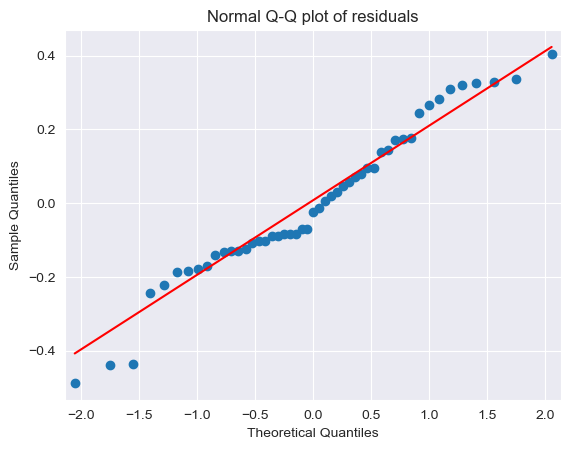

In [137]:
smf.qqplot(final_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [138]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

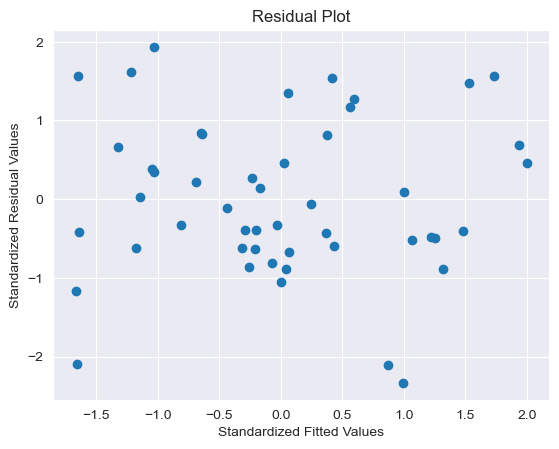

In [139]:
plt.scatter(get_standardized_values(final_model.fittedvalues), get_standardized_values(final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

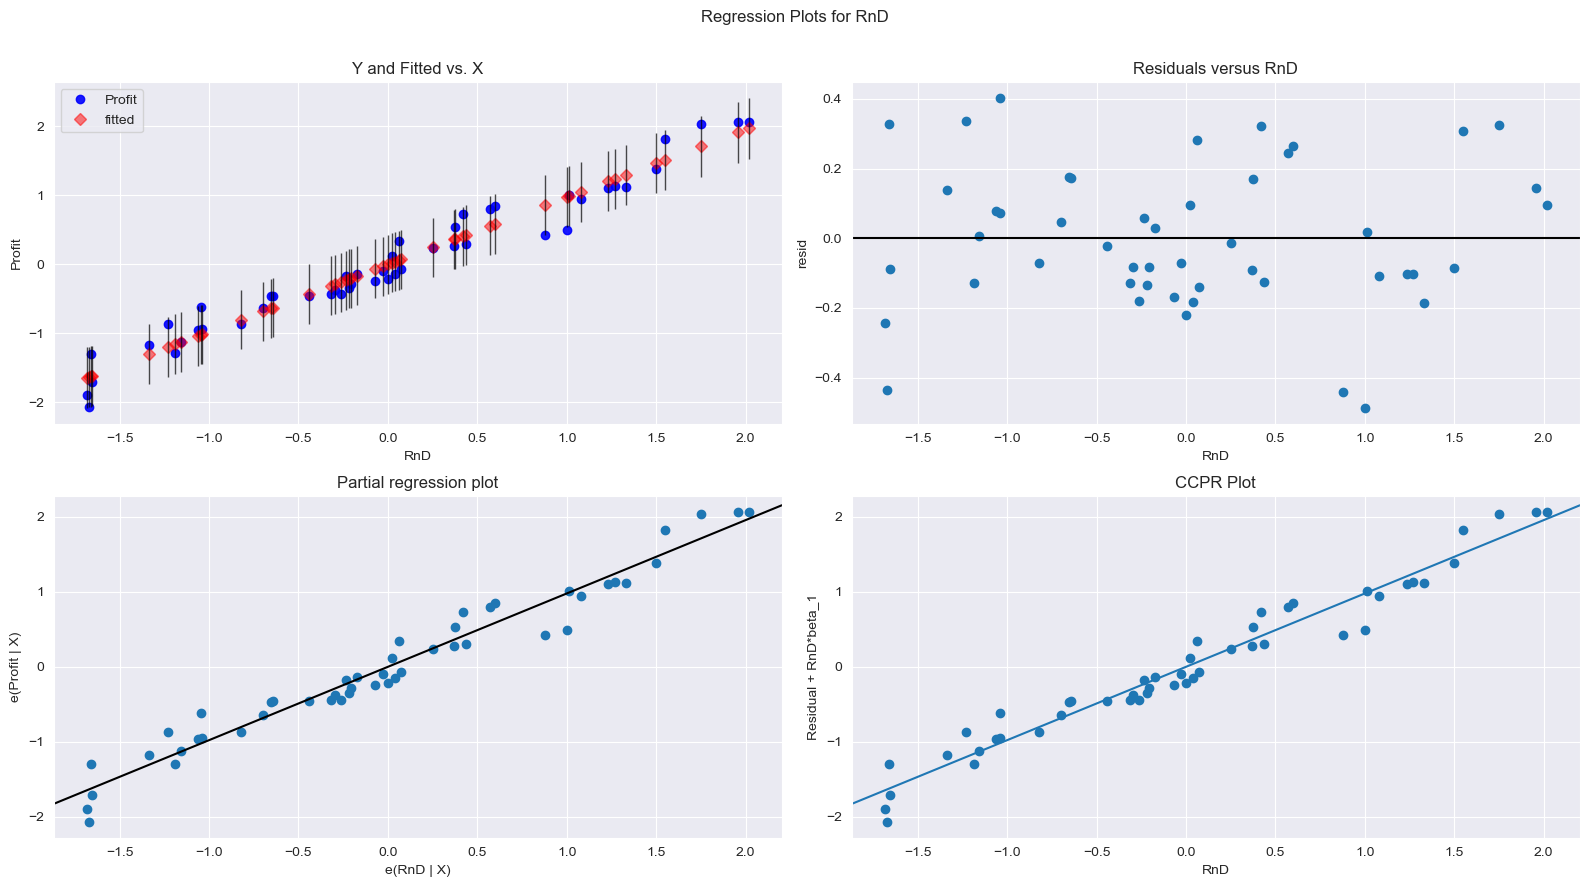

In [140]:
fig = plt.figure(figsize = (16,9))
plot_RnD = smf.graphics.plot_regress_exog(final_model, 'RnD', fig=fig)
plt.show()

In [141]:
influence_points=final_model.get_influence()
c, p_value=influence_points.cooks_distance

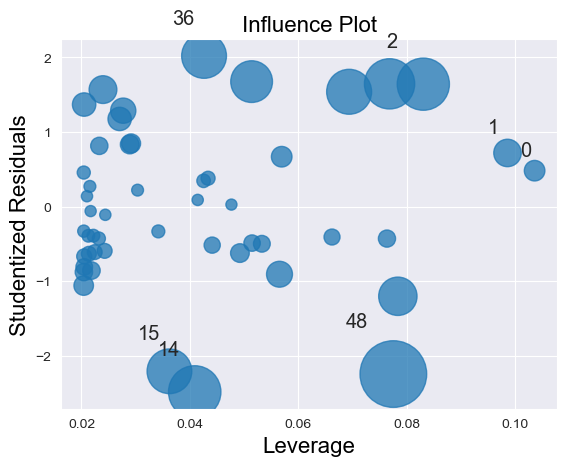

In [142]:
influence_plot(final_model)
plt.show()

In [143]:
a=df4.shape[1]
b=df4.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.02


Text(0, 0.5, "Cook's Distance")

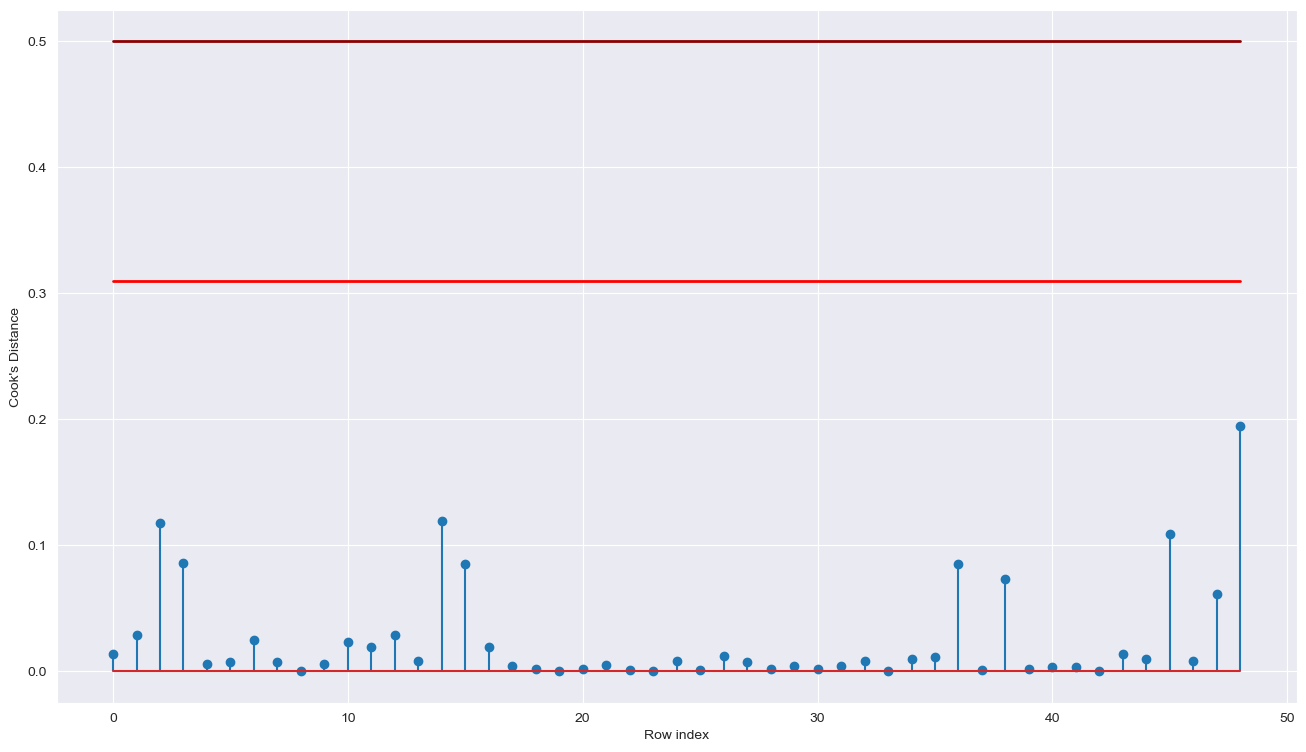

In [145]:
fig = plt.figure(figsize = (16,9))
x = [0,48]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.31,0.31]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(df4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")

In [148]:
predicted = pd.DataFrame(prediction_unscaled, columns=['Predicted_Profit'])
predicted['Profit'] = df4.Profit
predicted['RnD'] = df4.RnD
predicted

Predicted_Profit     Profit        RnD
0      127190.972310  192261.83  165349.20
1       47567.100134  191792.06  162597.70
2       46273.536587  191050.39  153441.51
3       63771.449327  182901.99  144372.41
4      130018.585885  166187.94  142107.34
5      115925.045735  156991.12  131876.90
6      109409.682624  156122.51  134615.46
7      101478.154406  155752.60  130298.13
8       96324.995921  152211.77  120542.52
9      112512.884433  149759.96  123334.88
10     128856.280808  146121.95  101913.08
11     172096.672108  144259.40  100671.96
12      89411.166921  141585.52   93863.75